<a href="https://colab.research.google.com/github/hnwestpage/Fusion-ML-COVID-19/blob/main/FeatFusionStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Master Code Compilation
-Hal West, February 2024

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Title: Package imports

# Description: Importing external libraries and packages
#-------------------------------------------------------------------------------

# Data retrieval and organization
import csv
import pandas as pd
import numpy as np
from numpy.core.fromnumeric import transpose

# Preprocessing, train-test splitting, and hyperparmeter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

# Machine learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Performance evaluation and graph displays
from sklearn import metrics
import math
from statistics import mean
import matplotlib.pyplot as plt

## Upload original COVID-19 patient data

In [ ]:
# Title: Separate (function)

# Description: Function written to separate labels from features of dataset
#-------------------------------------------------------------------------------
def separate(data):
  train = data.loc[:, data.columns != 'COVID']
  labels = data.loc[:, 'COVID'].values
  return train, labels

In [ ]:
# Title: Reading the data: Original strain COVID

# Description: This block handles reading and saving the data from .csv files in
#              the data folder. This section also sends the arrays to the above
#              "Separate" function to split the labels from the features.
#-------------------------------------------------------------------------------

# Reading blood chemistry dataset
bioChem = pd.read_csv("/content/drive/MyDrive/CDC HAI Modeling Project/Project 3 -- Hal/MFCSM's/Data/READbiochem.csv", header=0)
bioChem_df = pd.DataFrame(bioChem)
bioChem_df['COVID'] = bioChem.COVID

# Reading clinical characteristics dataset
symp = pd.read_csv("/content/drive/MyDrive/CDC HAI Modeling Project/Project 3 -- Hal/MFCSM's/Data/READsymptomEDIT.csv", header=0)
symp_df = pd.DataFrame(symp)
symp_df['COVID'] = symp.COVID

# Reading combined multimodal dataset
multi = pd.read_csv("/content/drive/MyDrive/CDC HAI Modeling Project/Project 3 -- Hal/MFCSM's/Data/READfusionEDIT.csv", header=0)
multi_df = pd.DataFrame(multi)
multi_df['COVID'] = multi.COVID

# Separating into labels and features
bioChem_trim, bioChem_labels = separate(bioChem)
symp_trim, symp_labels = separate(symp)
multi_trim, multi_labels = separate(multi)

## Upload Omicron variant COVID-19 patient data

In [ ]:
# Title: Reading the data: Omicron variant COVID

# Description: This block handles reading and saving the data from .csv files in
#              the data folder. This section also sends the arrays to the above
#              "Separate" function to split the labels from the features.
#-------------------------------------------------------------------------------
# Reading blood chemistry dataset
bioChemO = pd.read_csv("/content/drive/MyDrive/CDC HAI Modeling Project/Project 3 -- Hal/MFCSM's/Data/Omicron/READcovomicronchem.csv", header=0)
bioChemO_df = pd.DataFrame(bioChem)
bioChemO_df['COVID'] = bioChem.COVID

# Reading clinical characteristics dataset
sympO = pd.read_csv("/content/drive/MyDrive/CDC HAI Modeling Project/Project 3 -- Hal/MFCSM's/Data/Omicron/READcovomicronsymp.csv", header=0)
symp_dfO = pd.DataFrame(symp)
symp_dfO['COVID'] = symp.COVID

# Reading combined multimodal dataset
multiO = pd.read_csv("/content/drive/MyDrive/CDC HAI Modeling Project/Project 3 -- Hal/MFCSM's/Data/Omicron/READcovomicronFusion.csv", header=0)
multiO_df = pd.DataFrame(multi)
multiO_df['COVID'] = multi.COVID

# Separating into labels and features
bioChemO_trim, bioChemO_labels = separate(bioChemO)
sympO_trim, sympO_labels = separate(sympO)
multiO_trim, multiO_labels = separate(multiO)

In [ ]:
# Toggle Number of Runs
n_runs = 10

In [ ]:
# Title: Counting Hyperparameters from list

# Description: This block reads a list of dictionaries and counts the frequency
#              of each one, adding it to a larger dictionary. This is to get a
#              counthow many times a hyperparameter was the optimal choice for a
#              given model.
#-------------------------------------------------------------------------------
def CountParams(d):
  hyParams = {}

  for each in d:
    if each in hyParams:
      hyParams[each] += 1
    else:
      hyParams[each] = 1

  return hyParams

## Logistic Regression



### Original Trained Model


---





#### Hyperparameter Tuning, Training, and Prediction

In [ ]:
# Logistic Regression - Original------------------------------------------------

print('Original Data Runs\n')

# Parameter Grid
parameters = {'penalty': (None, 'l1', 'l2')}

# FPR recordings: 1-TNR, for plotting AUC
bc_fpr_runs = [] # Original Trained and Tested
sy_fpr_runs = []
fn_fpr_runs = []

bc_fpr_runs1 = [] # Original Trained and Omicron Tested
sy_fpr_runs1 = []
fn_fpr_runs1 = []

# TPR recordings: Sensitivity, Recall
bc_tpr_runs = [] # Original Trained and Tested
sy_tpr_runs = []
fn_tpr_runs = []

bc_tpr_runs1 = [] # Original Trained and Omicron Tested
sy_tpr_runs1 = []
fn_tpr_runs1 = []

# TNR recordings: Specificity, Sensitivity
bc_tnr_runs = [] # Original Trained and Tested
sy_tnr_runs = []
fn_tnr_runs = []

bc_tnr_runs1 = [] # Original Trained and Omicron Tested
sy_tnr_runs1 = []
fn_tnr_runs1 = []

# AUC recordings
bc_auc_runs = [] # Original Trained and Tested
sy_auc_runs = []
fn_auc_runs = []

bc_auc_runs1 = [] # Original Trained and Omicron Tested
sy_auc_runs1 = []
fn_auc_runs1 = []

# Coefficient recordings
bc_coeffs = []
sy_coeffs = []
fn_coeffs = []

# Best parameter recordings
bc_params = []
sy_params = []
fn_params = []

for i in range(n_runs):
  j = i+1
  print('Run: ',j,' ------------------------------------\n')

  # Train Test Split------------------------------------------------------------
  bioChem_train, bioChem_test, bioChem_labels_train, bioChem_labels_test = train_test_split(bioChem_trim, bioChem_labels, test_size = 1 / 5)
  symp_train, symp_test, symp_labels_train, symp_labels_test = train_test_split(symp_trim, symp_labels, test_size = 1 / 5)
  multi_train, multi_test, multi_labels_train, multi_labels_test = train_test_split(multi_trim, multi_labels, test_size = 1 / 5)

  # Scaling---------------------------------------------------------------------
  # Biochemical Data
  bioChem_scaler = StandardScaler()
  bioChem_train = bioChem_scaler.fit_transform(bioChem_train)
  bioChem_test = bioChem_scaler.transform(bioChem_test)

  # Clinical Data
  symp_scaler = StandardScaler()
  symp_train = symp_scaler.fit_transform(symp_train)
  symp_test = symp_scaler.transform(symp_test)

  # Fusion Data
  multi_scaler = StandardScaler()
  multi_train = multi_scaler.fit_transform(multi_train)
  multi_test = multi_scaler.transform(multi_test)

  # Model Training Grid Search--------------------------------------------------
  # Biochemical model
  bioChem_LR = LogisticRegression(solver='saga',max_iter=10000)
  bioChem_clf = GridSearchCV(bioChem_LR, parameters)
  bioChem_clf.fit(bioChem_train, bioChem_labels_train)

  # Clinical model
  symp_LR = LogisticRegression(solver='saga',max_iter=10000)
  symp_clf = GridSearchCV(symp_LR, parameters)
  symp_clf.fit(symp_train, symp_labels_train)

  # Fusion model
  multi_LR = LogisticRegression(solver='saga',max_iter=10000)
  multi_clf = GridSearchCV(multi_LR, parameters)
  multi_clf.fit(multi_train, multi_labels_train)

  # View results----------------------------------------------------------------
  target_names = ['Non-Severe COVID', 'Severe COVID']

  # Biochemical results---------------------------------------------------------
  #print('Biochemical Results\n')

  # Recording Best estimator
  bc_params.append(bioChem_clf.best_params_)

  # Recording Biochemical feature coefficients
  bc_coeffs.append(bioChem_clf.best_estimator_.coef_[0])

  """feature_importance_1 = pd.DataFrame({'Feature': bioChem_trim.columns, 'Importance': np.abs(bc_coeffs)})
  print('Feature ranking for severe COVID-19:\n', feature_importance_1.nlargest(5, 'Importance', keep='all'))"""

  # Predicting on testing hold-out data
  bioChem_labels_predict = bioChem_clf.predict(bioChem_test)

  # Predicting on Omicron Data
  bioChemO_trim_scale = bioChem_scaler.transform(bioChemO_trim)
  bioChemO_labels_predict = bioChem_clf.predict(bioChemO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(bioChem_labels_test, bioChem_labels_predict)
  bc_fpr_runs.append(fpr)
  bc_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(bioChemO_labels, bioChemO_labels_predict)
  bc_fpr_runs1.append(fpr1)
  bc_tpr_runs1.append(tpr1)

  # AUC
  BC_roc_auc = metrics.auc(fpr, tpr)
  bc_auc_runs.append(BC_roc_auc)

  # AUC - Omicron
  BC_roc_auc1 = metrics.auc(fpr1, tpr1)
  bc_auc_runs1.append(BC_roc_auc1)

  # Clinical results------------------------------------------------------------
  #print('Clinical Results\n')

  # Best estimator
  sy_params.append(symp_clf.best_params_)

  # Top 5 Clinical features
  sy_coeffs.append(symp_clf.best_estimator_.coef_[0])

  """feature_importance_2 = pd.DataFrame({'Feature': symp_trim.columns, 'Importance': np.abs(sy_coeffs)})
  print('Feature ranking for severe COVID-19:\n', feature_importance_2.nlargest(5, 'Importance', keep='all'))"""

  # Predicting on testing hold-out data
  symp_labels_predict = symp_clf.predict(symp_test)

  # Predicting on Omicron Data
  sympO_trim_scale = symp_scaler.transform(sympO_trim)
  sympO_labels_predict = symp_clf.predict(sympO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(symp_labels_test, symp_labels_predict)
  sy_fpr_runs.append(fpr)
  sy_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(sympO_labels,sympO_labels_predict)
  sy_fpr_runs1.append(fpr1)
  sy_tpr_runs1.append(tpr1)

  # AUC
  SY_roc_auc = metrics.auc(fpr, tpr)
  sy_auc_runs.append(SY_roc_auc)

  # AUC - Omicron
  SY_roc_auc1 = metrics.auc(fpr1, tpr1)
  sy_auc_runs1.append(SY_roc_auc1)

  # Fusion results--------------------------------------------------------------
  #print('Fusion Results\n')

  # Best estimator
  fn_params.append(multi_clf.best_params_)

  # Top 5 Fusion features
  fn_coeffs.append(multi_clf.best_estimator_.coef_[0])

  """feature_importance_3 = pd.DataFrame({'Feature': multi_trim.columns, 'Importance': np.abs(fn_coeffs)})
  print('Feature ranking for severe COVID-19:\n', feature_importance_3.nlargest(5, 'Importance', keep='all'))"""

  # Predicting on testing hold-out data
  multi_labels_predict = multi_clf.predict(multi_test)

  # Predicting on Omicron Data
  multiO_trim_scale = multi_scaler.transform(multiO_trim)
  multiO_labels_predict = multi_clf.predict(multiO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(multi_labels_test, multi_labels_predict)
  fn_fpr_runs.append(fpr)
  fn_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(multiO_labels, multiO_labels_predict)
  fn_fpr_runs1.append(fpr1)
  fn_tpr_runs1.append(tpr1)

  # AUC
  FN_roc_auc = metrics.auc(fpr, tpr)
  fn_auc_runs.append(FN_roc_auc)

  # AUC - Omicron
  FN_roc_auc1 = metrics.auc(fpr1, tpr1)
  fn_auc_runs1.append(FN_roc_auc1)

print(bc_params)
print(sy_params)
print(fn_params)

Original Data Runs

Run:  1  ------------------------------------

Run:  2  ------------------------------------

Run:  3  ------------------------------------

Run:  4  ------------------------------------

Run:  5  ------------------------------------

Run:  6  ------------------------------------

Run:  7  ------------------------------------

Run:  8  ------------------------------------

Run:  9  ------------------------------------

Run:  10  ------------------------------------

[{'penalty': 'l1'}, {'penalty': None}, {'penalty': 'l2'}, {'penalty': None}, {'penalty': None}, {'penalty': None}, {'penalty': None}, {'penalty': 'l2'}, {'penalty': 'l1'}, {'penalty': None}]
[{'penalty': 'l2'}, {'penalty': 'l2'}, {'penalty': 'l1'}, {'penalty': None}, {'penalty': 'l1'}, {'penalty': 'l2'}, {'penalty': 'l1'}, {'penalty': 'l1'}, {'penalty': 'l2'}, {'penalty': None}]
[{'penalty': 'l1'}, {'penalty': 'l1'}, {'penalty': None}, {'penalty': 'l2'}, {'penalty': None}, {'penalty': 'l2'}, {'penalty': 

#### Calculating Mean and Standard deviation of metrics

In [ ]:
# Saving TNR = 1 - FPR----------------------------------------------------------
# Original tested
bc_tnr_runs = np.ones((n_runs,3)) - bc_fpr_runs
sy_tnr_runs = np.ones((n_runs,3)) - sy_fpr_runs
fn_tnr_runs = np.ones((n_runs,3)) - fn_fpr_runs

# Omicron tested
bc_tnr_runs1 = np.ones((n_runs,3)) - bc_fpr_runs1
sy_tnr_runs1 = np.ones((n_runs,3)) - sy_fpr_runs1
fn_tnr_runs1 = np.ones((n_runs,3)) - fn_fpr_runs1

# Averaging over multiple runs--------------------------------------------------
# FPR
bc_avg_fpr = np.mean(bc_fpr_runs, axis=0)
sy_avg_fpr = np.mean(sy_fpr_runs, axis=0)
fn_avg_fpr = np.mean(fn_fpr_runs, axis=0)

# FPR - Omicron
bc_avg_fpr1 = np.mean(bc_fpr_runs1, axis=0)
sy_avg_fpr1 = np.mean(sy_fpr_runs1, axis=0)
fn_avg_fpr1 = np.mean(fn_fpr_runs1, axis=0)

# TPR
bc_avg_tpr = np.mean(bc_tpr_runs, axis=0)
sy_avg_tpr = np.mean(sy_tpr_runs, axis=0)
fn_avg_tpr = np.mean(fn_tpr_runs, axis=0)

# TPR - Omicron
bc_avg_tpr1 = np.mean(bc_tpr_runs1, axis=0)
sy_avg_tpr1 = np.mean(sy_tpr_runs1, axis=0)
fn_avg_tpr1 = np.mean(fn_tpr_runs1, axis=0)

# TNR
bc_avg_tnr = np.mean(bc_tnr_runs, axis=0)
sy_avg_tnr = np.mean(sy_tnr_runs, axis=0)
fn_avg_tnr = np.mean(fn_tnr_runs, axis=0)

# TNR - Omicron
bc_avg_tnr1 = np.mean(bc_tnr_runs1, axis=0)
sy_avg_tnr1 = np.mean(sy_tnr_runs1, axis=0)
fn_avg_tnr1 = np.mean(fn_tnr_runs1, axis=0)

# AUC
bc_avg_auc = np.mean(bc_auc_runs)
sy_avg_auc = np.mean(sy_auc_runs)
fn_avg_auc = np.mean(fn_auc_runs)

# AUC - Omicron
bc_avg_auc1 = np.mean(bc_auc_runs1)
sy_avg_auc1 = np.mean(sy_auc_runs1)
fn_avg_auc1 = np.mean(fn_auc_runs1)

# Standard Deviation of ROC plots-----------------------------------------------
# FPR
bc_std_fpr = np.std(bc_fpr_runs, axis=0)
sy_std_fpr = np.std(sy_fpr_runs, axis=0)
fn_std_fpr = np.std(fn_fpr_runs, axis=0)

# FPR - Omicron
bc_std_fpr1 = np.std(bc_fpr_runs1, axis=0)
sy_std_fpr1 = np.std(sy_fpr_runs1, axis=0)
fn_std_fpr1 = np.std(fn_fpr_runs1, axis=0)

# TPR
bc_std_tpr = np.std(bc_tpr_runs, axis=0)
sy_std_tpr = np.std(sy_tpr_runs, axis=0)
fn_std_tpr = np.std(fn_tpr_runs, axis=0)

# TPR - Omicron
bc_std_tpr1 = np.std(bc_tpr_runs1, axis=0)
sy_std_tpr1 = np.std(sy_tpr_runs1, axis=0)
fn_std_tpr1 = np.std(fn_tpr_runs1, axis=0)

# Averaging coefficients--------------------------------------------------------
bc_mean_coeffs = np.mean(bc_coeffs, axis=0)
sy_mean_coeffs = np.mean(sy_coeffs, axis=0)
fn_mean_coeffs = np.mean(fn_coeffs, axis=0)

# Printing Results--------------------------------------------------------------
# FPR
print('Mean FPR, original/original, BC: ', bc_avg_fpr)
print('Mean FPR, original/original, SY: ', sy_avg_fpr)
print('Mean FPR, original/original, FN: ', fn_avg_fpr)

# FPR - Omicron
print('Mean FPR, original/omicron, BC: ', bc_avg_fpr1)
print('Mean FPR, original/omicron, SY: ', sy_avg_fpr1)
print('Mean FPR, original/omicron, FN: ', fn_avg_fpr1)

print('\n')

# TPR
print('Mean TPR, original/original, BC: ', bc_avg_tpr)
print('Mean TPR, original/original, SY: ', sy_avg_tpr)
print('Mean TPR, original/original, FN: ', fn_avg_tpr)

# TPR - Omicron
print('Mean TPR, original/omicron, BC: ', bc_avg_tpr1)
print('Mean TPR, original/omicron, SY: ', sy_avg_tpr1)
print('Mean TPR, original/omicron, FN: ', fn_avg_tpr1)

print('\n')

# TNR
print('Mean TNR, original/original, BC: ', bc_avg_tnr)
print('Mean TNR, original/original, SY: ', sy_avg_tnr)
print('Mean TNR, original/original, FN: ', fn_avg_tnr)

# TNR - Omicron
print('Mean TNR, original/omicron, BC: ', bc_avg_tnr1)
print('Mean TNR, original/omicron, SY: ', sy_avg_tnr1)
print('Mean TNR, original/omicron, FN: ', fn_avg_tnr1)

print('\n')

# AUC
print('AUC of biochem composite ROC curve',metrics.auc(bc_avg_fpr, bc_avg_tpr))
print('AUC of symp composite ROC curve',metrics.auc(sy_avg_fpr, sy_avg_tpr))
print('AUC of fusion composite ROC curve',metrics.auc(fn_avg_fpr, fn_avg_tpr))

# AUC - Omicron
print('AUC of biochem composite ROC curve (Omicron)',metrics.auc(bc_avg_fpr1, bc_avg_tpr1))
print('AUC of symp composite ROC curve (Omicron)',metrics.auc(sy_avg_fpr1, sy_avg_tpr1))
print('AUC of fusion composite ROC curve (Omicron)',metrics.auc(fn_avg_fpr1, fn_avg_tpr1))



Mean FPR, original/original, BC:  [0.         0.17179324 1.        ]
Mean FPR, original/original, SY:  [0.         0.22071261 1.        ]
Mean FPR, original/original, FN:  [0.         0.18537351 1.        ]
Mean FPR, original/omicron, BC:  [0.     0.1972 1.    ]
Mean FPR, original/omicron, SY:  [0.     0.1796 1.    ]
Mean FPR, original/omicron, FN:  [0.     0.1876 1.    ]


Mean TPR, original/original, BC:  [0.         0.53520784 1.        ]
Mean TPR, original/original, SY:  [0.         0.64614261 1.        ]
Mean TPR, original/original, FN:  [0.         0.66884569 1.        ]
Mean TPR, original/omicron, BC:  [0.    0.668 1.   ]
Mean TPR, original/omicron, SY:  [0.     0.7064 1.    ]
Mean TPR, original/omicron, FN:  [0.    0.758 1.   ]


Mean TNR, original/original, BC:  [1.         0.82820676 0.        ]
Mean TNR, original/original, SY:  [1.         0.77928739 0.        ]
Mean TNR, original/original, FN:  [1.         0.81462649 0.        ]
Mean TNR, original/omicron, BC:  [1.     0.80

#### Displaying ROC Plots and AUC

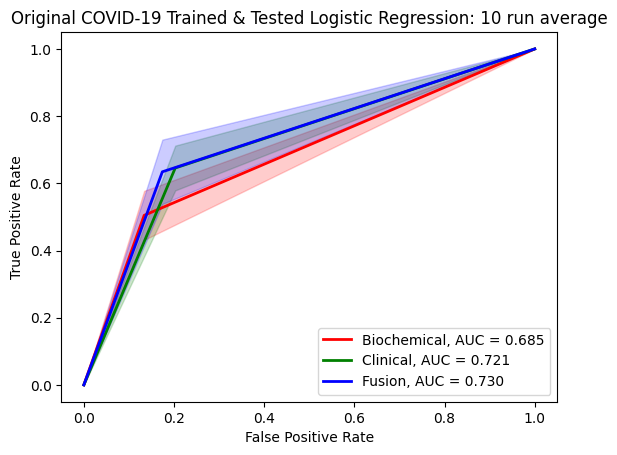

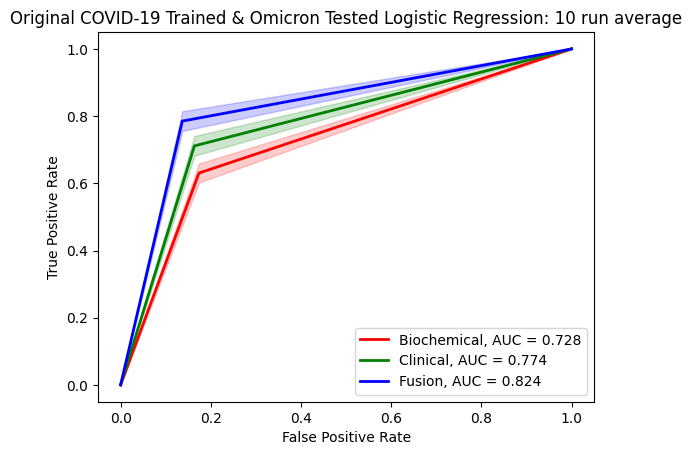

In [ ]:
# ROC Plots---------------------------------------------------------------------
# Plotting the average runs - Original Tested
fig, ax = plt.subplots()
ax.plot(bc_avg_fpr, bc_avg_tpr, label = 'Biochemical, AUC = %.3f'%bc_avg_auc, color='red', linewidth=2)
ax.plot(sy_avg_fpr, sy_avg_tpr, label = 'Clinical, AUC = %.3f'%sy_avg_auc, color='green', linewidth=2)
ax.plot(fn_avg_fpr, fn_avg_tpr, label = 'Fusion, AUC = %.3f'%fn_avg_auc, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bc_avg_fpr, bc_avg_tpr + bc_std_tpr, bc_avg_tpr - bc_std_tpr, alpha=0.2, color='red')
ax.fill_between(sy_avg_fpr, sy_avg_tpr + sy_std_tpr, sy_avg_tpr - sy_std_tpr, alpha=0.2, color='green')
ax.fill_between(fn_avg_fpr, fn_avg_tpr + fn_std_tpr, fn_avg_tpr - fn_std_tpr, alpha=0.2, color='blue')

plt.title(label='Original COVID-19 Trained & Tested Logistic Regression: 10 run average')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the average runs - Omicron Tested
fig, ax = plt.subplots()
ax.plot(bc_avg_fpr1, bc_avg_tpr1, label = 'Biochemical, AUC = %.3f'%bc_avg_auc1, color='red', linewidth=2)
ax.plot(sy_avg_fpr1, sy_avg_tpr1, label = 'Clinical, AUC = %.3f'%sy_avg_auc1, color='green', linewidth=2)
ax.plot(fn_avg_fpr1, fn_avg_tpr1, label = 'Fusion, AUC = %.3f'%fn_avg_auc1, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bc_avg_fpr1, bc_avg_tpr1 + bc_std_tpr1, bc_avg_tpr1 - bc_std_tpr1, alpha=0.2, color='red')
ax.fill_between(sy_avg_fpr1, sy_avg_tpr1 + sy_std_tpr1, sy_avg_tpr1 - sy_std_tpr1, alpha=0.2, color='green')
ax.fill_between(fn_avg_fpr1, fn_avg_tpr1 + fn_std_tpr1, fn_avg_tpr1 - fn_std_tpr1, alpha=0.2, color='blue')

plt.title(label='Original COVID-19 Trained & Omicron Tested Logistic Regression: 10 run average')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Omicron Trained Model


---



#### Hyperparameter Tuning, Training, and Prediction

In [ ]:
# Logistic Regression - Omicron-------------------------------------------------

print('Omicron Data Runs\n')

# Parameter Grid
parameters = {'penalty': (None, 'l1', 'l2')}

# FPR recordings: 1 - TNR, for plotting ROC
bcO_fpr_runs = [] # Omicron trained and tested
syO_fpr_runs = []
fnO_fpr_runs = []

bcO_fpr_runs1 = [] # Omicron trained and original tested
syO_fpr_runs1 = []
fnO_fpr_runs1 = []

# TPR recordings: Sensitivity, Recall
bcO_tpr_runs = [] # Omicron trained and tested
syO_tpr_runs = []
fnO_tpr_runs = []

bcO_tpr_runs1 = [] # Omicron trained and original tested
syO_tpr_runs1 = []
fnO_tpr_runs1 = []

# TNR recordings: Specificity, Sensitivity
bcO_tnr_runs = [] # Omicron Trained and Tested
syO_tnr_runs = []
fnO_tnr_runs = []

bcO_tnr_runs1 = [] # Omicron Trained and original Tested
syO_tnr_runs1 = []
fnO_tnr_runs1 = []

# AUC recordings
bcO_auc_runs = [] # Omicron trained and tested
syO_auc_runs = []
fnO_auc_runs = []

bcO_auc_runs1 = [] # Omicron trained and original tested
syO_auc_runs1 = []
fnO_auc_runs1 = []

# Coefficient recordings
bcO_coeffs = []
syO_coeffs = []
fnO_coeffs = []

# Best parameter recordings
bcO_params = []
syO_params = []
fnO_params = []

for i in range(n_runs):
  j = i+1
  print('Run: ',j,'------------------------------------\n')

  # Train Test Split------------------------------------------------------------
  bioChemO_train, bioChemO_test, bioChemO_labels_train, bioChemO_labels_test = train_test_split(bioChemO_trim, bioChemO_labels, test_size = 1 / 5)
  sympO_train, sympO_test, sympO_labels_train, sympO_labels_test = train_test_split(sympO_trim, sympO_labels, test_size = 1 / 5)
  multiO_train, multiO_test, multiO_labels_train, multiO_labels_test = train_test_split(multiO_trim, multiO_labels, test_size = 1 / 5)

  # Scaling---------------------------------------------------------------------
  # Biochemical Data
  bioChemO_scaler = StandardScaler()
  bioChemO_train = bioChemO_scaler.fit_transform(bioChemO_train)
  bioChemO_test = bioChemO_scaler.transform(bioChemO_test)

  # Clinical Data
  sympO_scaler = StandardScaler()
  sympO_train = sympO_scaler.fit_transform(sympO_train)
  sympO_test = sympO_scaler.transform(sympO_test)

  # Fusion Data
  multiO_scaler = StandardScaler()
  multiO_train = multiO_scaler.fit_transform(multiO_train)
  multiO_test = multiO_scaler.transform(multiO_test)

  # Model Training Grid Search--------------------------------------------------
  bioChemO_LR = LogisticRegression(solver='saga',max_iter=10000)
  bioChemO_clf = GridSearchCV(bioChemO_LR, parameters)
  bioChemO_clf.fit(bioChemO_train, bioChemO_labels_train)

  # Clinical model
  sympO_LR = LogisticRegression(solver='saga',max_iter=10000)
  sympO_clf = GridSearchCV(sympO_LR, parameters)
  sympO_clf.fit(sympO_train, sympO_labels_train)

  # Fusion model
  multiO_LR = LogisticRegression(solver='saga',max_iter=10000)
  multiO_clf = GridSearchCV(multiO_LR, parameters)
  multiO_clf.fit(multiO_train, multiO_labels_train)

  # View results----------------------------------------------------------------
  target_names = ['Non-Severe COVID', 'Severe COVID']

  # Biochemical results---------------------------------------------------------
  print('Biochemical Results\n')

  # Best estimator
  bcO_params.append(bioChemO_clf.best_params_)

  # Top 5 Biochemical features
  bcO_coeffs.append(bioChemO_clf.best_estimator_.coef_[0])

  """feature_importance_1 = pd.DataFrame({'Feature': bioChemO_trim.columns, 'Importance': np.abs(bcO_coeffs)})
  print('Feature ranking for severe COVID-19:', feature_importance_1.nlargest(5, 'Importance', keep='all'))"""

  # Predicting on testing hold-out data
  bioChemO_labels_predict = bioChemO_clf.predict(bioChemO_test)

  # Predicting on original COIVD-19 data
  bioChem_trim_scale = bioChemO_scaler.transform(bioChem_trim)
  bioChem_labels_predict1 = bioChemO_clf.predict(bioChem_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(bioChemO_labels_test, bioChemO_labels_predict)
  bcO_fpr_runs.append(fpr)
  bcO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(bioChem_labels, bioChem_labels_predict1)
  bcO_fpr_runs1.append(fpr1)
  bcO_tpr_runs1.append(tpr1)

  # AUC
  BCO_roc_auc = metrics.auc(fpr, tpr)
  bcO_auc_runs.append(BCO_roc_auc)

  # AUC - Original
  BCO_roc_auc1 = metrics.auc(fpr1, tpr1)
  bcO_auc_runs1.append(BCO_roc_auc1)

  # Clinical results---------------------------------------------------------
  print('Clinical Results\n')

  # Best estimator
  syO_params.append(sympO_clf.best_params_)

  # Top 5 Clinical features
  syO_coeffs.append(sympO_clf.best_estimator_.coef_[0])

  """feature_importance_2 = pd.DataFrame({'Feature': sympO_trim.columns, 'Importance': np.abs(syO_coeffs)})
  print('Feature ranking for severe COVID-19:', feature_importance_2.nlargest(5, 'Importance', keep='all'))
"""
  # Predicting on testing hold-out data
  sympO_labels_predict = sympO_clf.predict(sympO_test)

  # Predicting on original COIVD-19 data
  symp_trim_scale = sympO_scaler.transform(symp_trim)
  symp_labels_predict1 = sympO_clf.predict(symp_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(sympO_labels_test, sympO_labels_predict)
  syO_fpr_runs.append(fpr)
  syO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(symp_labels, symp_labels_predict1)
  syO_fpr_runs1.append(fpr1)
  syO_tpr_runs1.append(tpr1)

  # AUC
  SYO_roc_auc = metrics.auc(fpr, tpr)
  syO_auc_runs.append(SYO_roc_auc)

  # AUC - Original
  SYO_roc_auc1 = metrics.auc(fpr1, tpr1)
  syO_auc_runs1.append(SYO_roc_auc1)

  # Fusion results--------------------------------------------------------------
  print('Fusion Results\n')

  # Best estimator
  fnO_params.append(multiO_clf.best_params_)

  # Top 5 Fusion features
  fnO_coeffs.append(multiO_clf.best_estimator_.coef_[0])

  """feature_importance_3 = pd.DataFrame({'Feature': multiO_trim.columns, 'Importance': np.abs(fnO_coeffs)})
  print('Feature ranking for severe COVID-19:', feature_importance_3.nlargest(5, 'Importance', keep='all'))"""

  # Predicting on testing hold-out data
  multiO_labels_predict = multiO_clf.predict(multiO_test)

  # Predicting on original COIVD-19 data
  multi_trim_scale = multiO_scaler.transform(multi_trim)
  multi_labels_predict1 = multiO_clf.predict(multi_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(multiO_labels_test, multiO_labels_predict)
  fnO_fpr_runs.append(fpr)
  fnO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(multi_labels, multi_labels_predict1)
  fnO_fpr_runs1.append(fpr1)
  fnO_tpr_runs1.append(tpr1)

  # AUC
  FNO_roc_auc = metrics.auc(fpr, tpr)
  fnO_auc_runs.append(FNO_roc_auc)

  # AUC - Original
  FNO_roc_auc1 = metrics.auc(fpr1, tpr1)
  fnO_auc_runs1.append(FNO_roc_auc1)

print(bcO_params)
print(syO_params)
print(fnO_params)

Omicron Data Runs

Run:  1 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  2 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  3 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  4 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  5 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  6 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  7 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  8 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  9 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  10 ------------------------------------

Biochemical Results

Clin

#### Calculating Mean and Standard deviation of metrics

In [ ]:
# Saving TNR = 1 - FPR----------------------------------------------------------
# Omicron tested
bcO_tnr_runs = np.ones((n_runs,3)) - bcO_fpr_runs
syO_tnr_runs = np.ones((n_runs,3)) - syO_fpr_runs
fnO_tnr_runs = np.ones((n_runs,3)) - fnO_fpr_runs

# Original tested
bcO_tnr_runs1 = np.ones((n_runs,3)) - bcO_fpr_runs1
syO_tnr_runs1 = np.ones((n_runs,3)) - syO_fpr_runs1
fnO_tnr_runs1 = np.ones((n_runs,3)) - fnO_fpr_runs1

# Averaging over multiple runs--------------------------------------------------
# FPR
bcO_avg_fpr = np.mean(bcO_fpr_runs, axis=0)
syO_avg_fpr = np.mean(syO_fpr_runs, axis=0)
fnO_avg_fpr = np.mean(fnO_fpr_runs, axis=0)

# FPR - Original
bcO_avg_fpr1 = np.mean(bcO_fpr_runs1, axis=0)
syO_avg_fpr1 = np.mean(syO_fpr_runs1, axis=0)
fnO_avg_fpr1 = np.mean(fnO_fpr_runs1, axis=0)

# TPR
bcO_avg_tpr = np.mean(bcO_tpr_runs, axis=0)
syO_avg_tpr = np.mean(syO_tpr_runs, axis=0)
fnO_avg_tpr = np.mean(fnO_tpr_runs, axis=0)

# TPR - Original
bcO_avg_tpr1 = np.mean(bcO_tpr_runs1, axis=0)
syO_avg_tpr1 = np.mean(syO_tpr_runs1, axis=0)
fnO_avg_tpr1 = np.mean(fnO_tpr_runs1, axis=0)

# TNR
bcO_avg_tnr = np.mean(bcO_tnr_runs, axis=0)
syO_avg_tnr = np.mean(syO_tnr_runs, axis=0)
fnO_avg_tnr = np.mean(fnO_tnr_runs, axis=0)

# TNR - Original
bcO_avg_tnr1 = np.mean(bcO_tnr_runs1, axis=0)
syO_avg_tnr1 = np.mean(syO_tnr_runs1, axis=0)
fnO_avg_tnr1 = np.mean(fnO_tnr_runs1, axis=0)

# AUC
bcO_avg_auc = np.mean(bcO_auc_runs)
syO_avg_auc = np.mean(syO_auc_runs)
fnO_avg_auc = np.mean(fnO_auc_runs)

# AUC - Original
bcO_avg_auc1 = np.mean(bcO_auc_runs1)
syO_avg_auc1 = np.mean(syO_auc_runs1)
fnO_avg_auc1 = np.mean(fnO_auc_runs1)

# Standard Deviation of ROC plots-----------------------------------------------
# FPR
bcO_std_fpr = np.std(bcO_fpr_runs, axis=0)
syO_std_fpr = np.std(syO_fpr_runs, axis=0)
fnO_std_fpr = np.std(fnO_fpr_runs, axis=0)

# FPR - Original
bcO_std_fpr1 = np.std(bcO_fpr_runs1, axis=0)
syO_std_fpr1 = np.std(syO_fpr_runs1, axis=0)
fnO_std_fpr1 = np.std(fnO_fpr_runs1, axis=0)

# TPR
bcO_std_tpr = np.std(bcO_tpr_runs, axis=0)
syO_std_tpr = np.std(syO_tpr_runs, axis=0)
fnO_std_tpr = np.std(fnO_tpr_runs, axis=0)

# TPR - Original
bcO_std_tpr1 = np.std(bcO_tpr_runs1, axis=0)
syO_std_tpr1 = np.std(syO_tpr_runs1, axis=0)
fnO_std_tpr1 = np.std(fnO_tpr_runs1, axis=0)

# Averaging coefficients--------------------------------------------------------
bcO_mean_coeffs = np.mean(bcO_coeffs, axis=0)
syO_mean_coeffs = np.mean(syO_coeffs, axis=0)
fnO_mean_coeffs = np.mean(fnO_coeffs, axis=0)

# Printing Results--------------------------------------------------------------
# FPR
print('Mean FPR, omicron/omicron, BC: ', bcO_avg_fpr)
print('Mean FPR, omicron/omicron, SY: ', syO_avg_fpr)
print('Mean FPR, omicron/omicron, FN: ', fnO_avg_fpr)

# FPR - Original
print('Mean FPR, omicron/original, BC: ', bcO_avg_fpr1)
print('Mean FPR, omicron/original, SY: ', syO_avg_fpr1)
print('Mean FPR, omicron/original, FN: ', fnO_avg_fpr1)

print('\n')

# TPR
print('Mean TPR, omicron/omicron, BC: ', bcO_avg_tpr)
print('Mean TPR, omicron/omicron, SY: ', syO_avg_tpr)
print('Mean TPR, omicron/omicron, FN: ', fnO_avg_tpr)

# TPR - Original
print('Mean TPR, omicron/original, BC: ', bcO_avg_tpr1)
print('Mean TPR, omicron/original, SY: ', syO_avg_tpr1)
print('Mean TPR, omicron/original, FN: ', fnO_avg_tpr1)

print('\n')

# TNR
print('Mean TNR, omicron/omicron, BC: ', bcO_avg_tnr)
print('Mean TNR, omicron/omicron, SY: ', syO_avg_tnr)
print('Mean TNR, omicron/omicron, FN: ', fnO_avg_tnr)

# TNR - Original
print('Mean TNR, omicron/original, BC: ', bcO_avg_tnr1)
print('Mean TNR, omicron/original, SY: ', syO_avg_tnr1)
print('Mean TNR, omicron/original, FN: ', fnO_avg_tnr1)

print('\n')

# AUC
print('AUC of biochem composite ROC curve',metrics.auc(bcO_avg_fpr, bcO_avg_tpr))
print('AUC of symp composite ROC curve',metrics.auc(syO_avg_fpr, syO_avg_tpr))
print('AUC of fusion composite ROC curve',metrics.auc(fnO_avg_fpr, fnO_avg_tpr))

# AUC - Original
print('AUC of biochem composite ROC curve (Original)',metrics.auc(bcO_avg_fpr1, bcO_avg_tpr1))
print('AUC of symp composite ROC curve (Original)',metrics.auc(syO_avg_fpr1, syO_avg_tpr1))
print('AUC of fusion composite ROC curve (Original)',metrics.auc(fnO_avg_fpr1, fnO_avg_tpr1))

Mean FPR, omicron/omicron, BC:  [0.         0.11711441 1.        ]
Mean FPR, omicron/omicron, SY:  [0.         0.17252569 1.        ]
Mean FPR, omicron/omicron, FN:  [0.         0.09205122 1.        ]
Mean FPR, omicron/original, BC:  [0.         0.22149533 1.        ]
Mean FPR, omicron/original, SY:  [0.        0.2364486 1.       ]
Mean FPR, omicron/original, FN:  [0.         0.20700935 1.        ]


Mean TPR, omicron/omicron, BC:  [0.         0.84125963 1.        ]
Mean TPR, omicron/omicron, SY:  [0.         0.82256179 1.        ]
Mean TPR, omicron/omicron, FN:  [0.         0.92002987 1.        ]
Mean TPR, omicron/original, BC:  [0.         0.58310811 1.        ]
Mean TPR, omicron/original, SY:  [0.         0.77432432 1.        ]
Mean TPR, omicron/original, FN:  [0.         0.71081081 1.        ]


Mean TNR, omicron/omicron, BC:  [1.         0.88288559 0.        ]
Mean TNR, omicron/omicron, SY:  [1.         0.82747431 0.        ]
Mean TNR, omicron/omicron, FN:  [1.         0.90794878 

#### Displaying ROC Plots and AUC



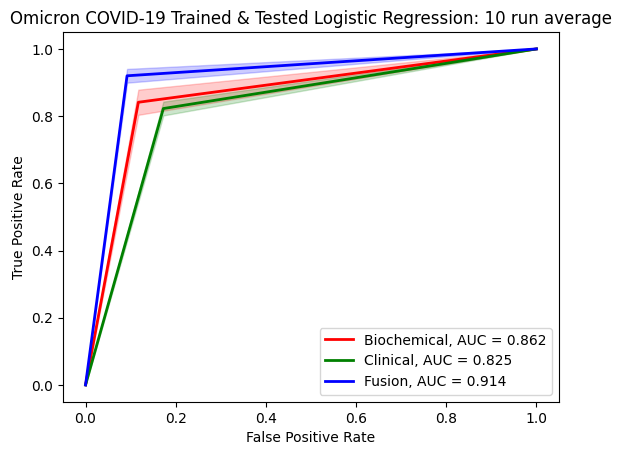

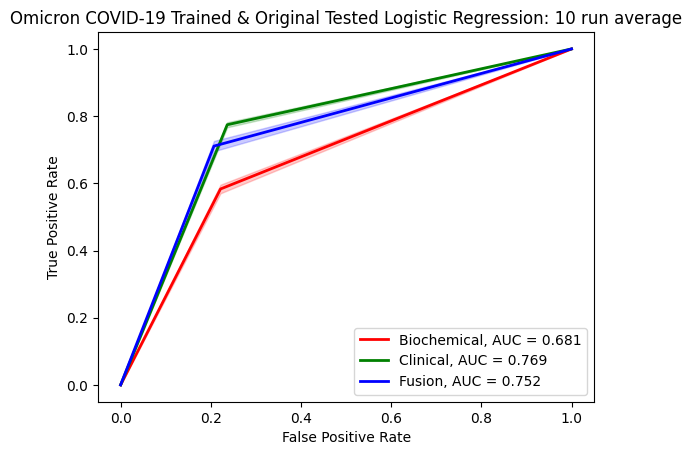

In [ ]:
# ROC Plots---------------------------------------------------------------------
# Plotting the average runs - Omicron Tested
fig, ax = plt.subplots()
ax.plot(bcO_avg_fpr, bcO_avg_tpr, label = 'Biochemical, AUC = %.3f'%bcO_avg_auc, color='red', linewidth=2)
ax.plot(syO_avg_fpr, syO_avg_tpr, label = 'Clinical, AUC = %.3f'%syO_avg_auc, color='green', linewidth=2)
ax.plot(fnO_avg_fpr, fnO_avg_tpr, label = 'Fusion, AUC = %.3f'%fnO_avg_auc, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bcO_avg_fpr, bcO_avg_tpr + bcO_std_tpr, bcO_avg_tpr - bcO_std_tpr, alpha=0.2, color='red')
ax.fill_between(syO_avg_fpr, syO_avg_tpr + syO_std_tpr, syO_avg_tpr - syO_std_tpr, alpha=0.2, color='green')
ax.fill_between(fnO_avg_fpr, fnO_avg_tpr + fnO_std_tpr, fnO_avg_tpr - fnO_std_tpr, alpha=0.2, color='blue')

plt.title(label='Omicron COVID-19 Trained & Tested Logistic Regression: 10 run average')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the average runs - Original Tested
fig, ax = plt.subplots()
ax.plot(bcO_avg_fpr1, bcO_avg_tpr1, label = 'Biochemical, AUC = %.3f'%bcO_avg_auc1, color='red', linewidth=2)
ax.plot(syO_avg_fpr1, syO_avg_tpr1, label = 'Clinical, AUC = %.3f'%syO_avg_auc1, color='green', linewidth=2)
ax.plot(fnO_avg_fpr1, fnO_avg_tpr1, label = 'Fusion, AUC = %.3f'%fnO_avg_auc1, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bcO_avg_fpr1, bcO_avg_tpr1 + bcO_std_tpr1, bcO_avg_tpr1 - bcO_std_tpr1, alpha=0.2, color='red')
ax.fill_between(syO_avg_fpr1, syO_avg_tpr1 + syO_std_tpr1, syO_avg_tpr1 - syO_std_tpr1, alpha=0.2, color='green')
ax.fill_between(fnO_avg_fpr1, fnO_avg_tpr1 + fnO_std_tpr1, fnO_avg_tpr1 - fnO_std_tpr1, alpha=0.2, color='blue')

plt.title(label='Omicron COVID-19 Trained & Original Tested Logistic Regression: 10 run average')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Feature Importance

Text(0.5, 1.0, 'Omicron (Fusion) Trained Logistic Regression Ranked Features: 10 run average')

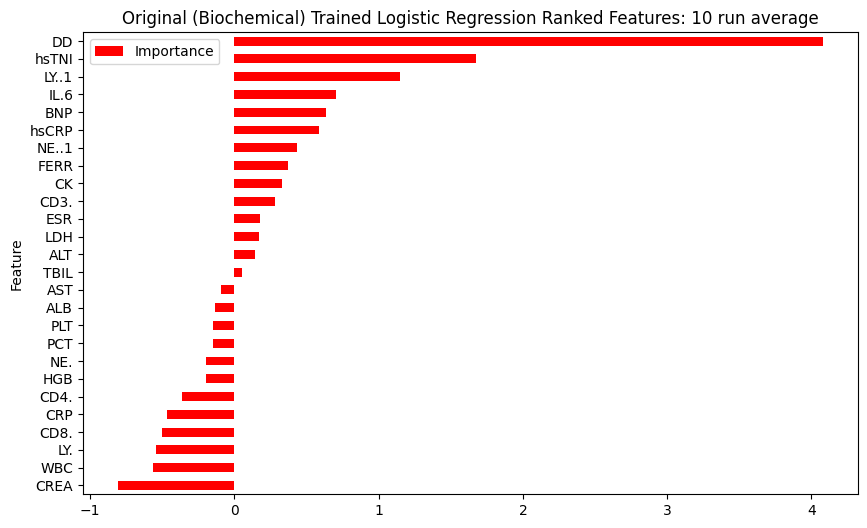

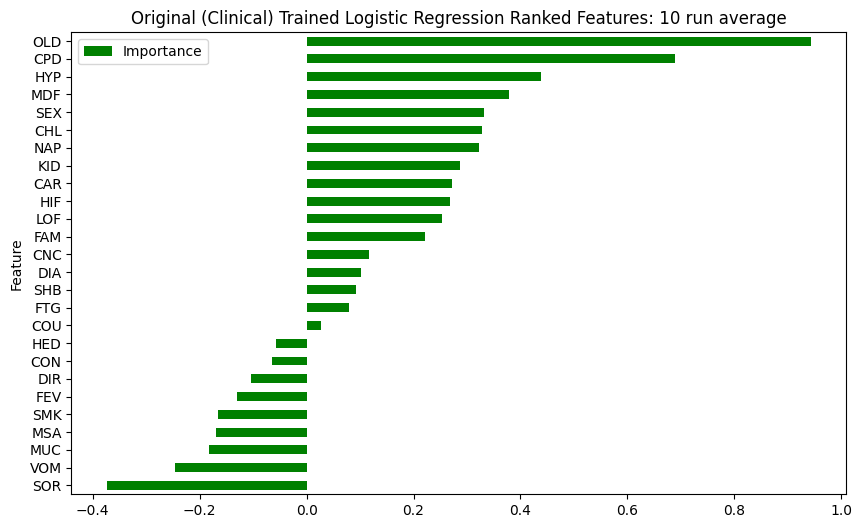

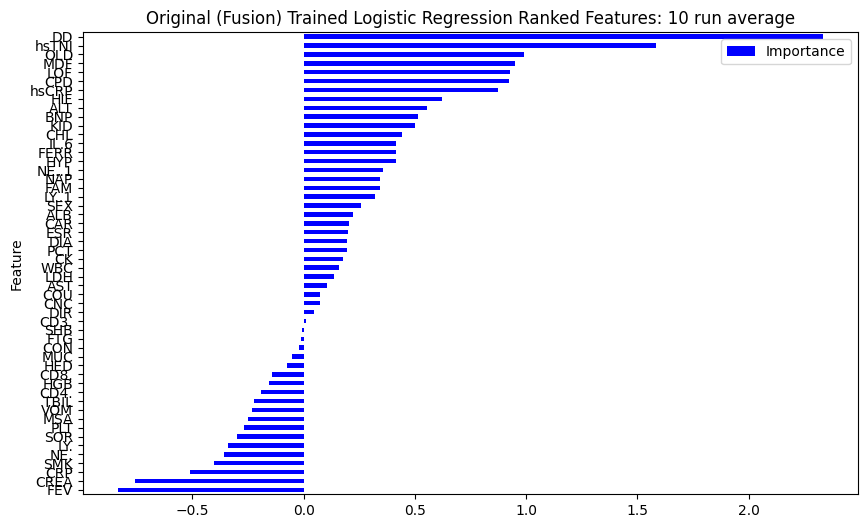

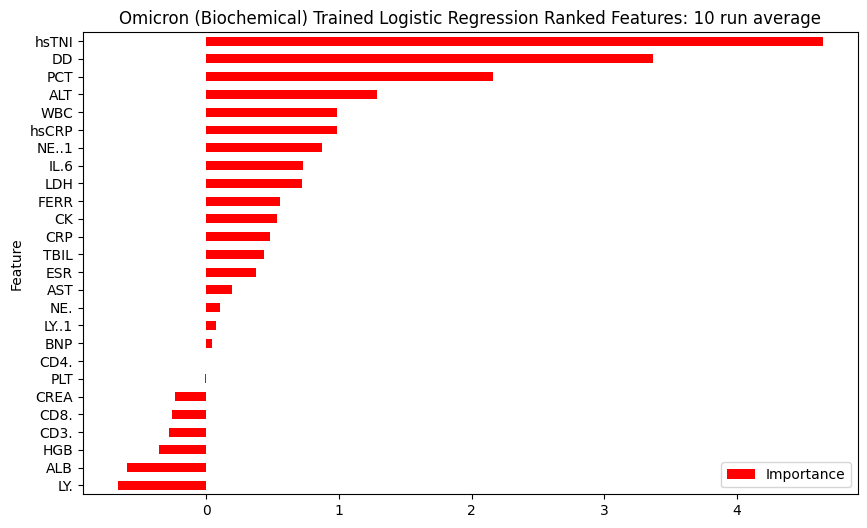

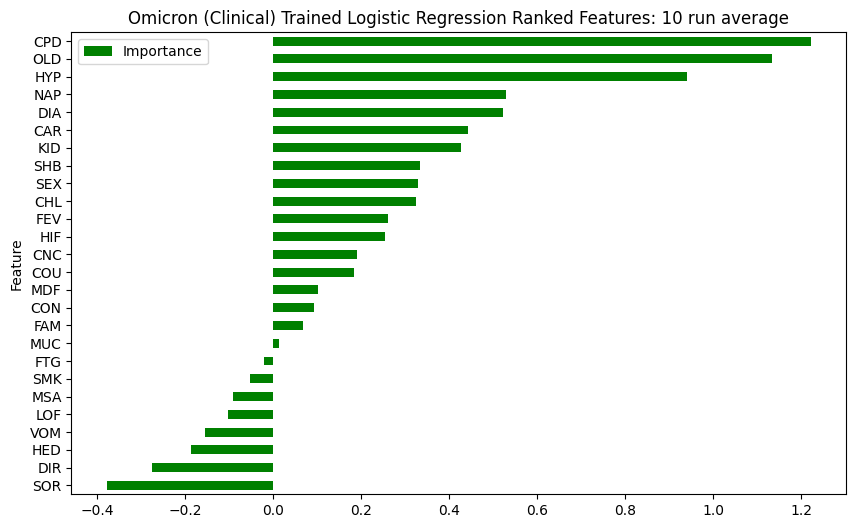

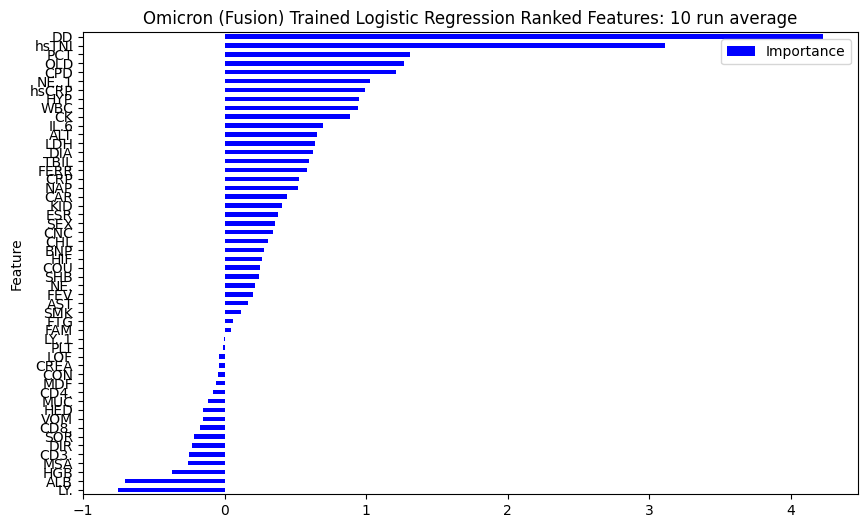

In [ ]:
# Original COVID-19 Data--------------------------------------------------------

# Best Coefficients of Biochemical Models
feature_importance = pd.DataFrame({'Feature': bioChem_trim.columns, 'Importance': bc_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='red', figsize=(10, 6))
plt.title(label='Original (Biochemical) Trained Logistic Regression Ranked Features: 10 run average')

# Best Coefficients of Clinical Models
feature_importance = pd.DataFrame({'Feature': symp_trim.columns, 'Importance': sy_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='green', figsize=(10, 6))
plt.title(label='Original (Clinical) Trained Logistic Regression Ranked Features: 10 run average')

# Best Coefficients of Fusion Models
fn_coeffs = multi_clf.best_estimator_.coef_[0]

feature_importance = pd.DataFrame({'Feature': multi_trim.columns, 'Importance': fn_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='blue', figsize=(10, 6))
plt.title(label='Original (Fusion) Trained Logistic Regression Ranked Features: 10 run average')

# Omicron COVID-19 Data--------------------------------------------------------

# Best Coefficients of Biochemical Models
feature_importance = pd.DataFrame({'Feature': bioChemO_trim.columns, 'Importance': bcO_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='red', figsize=(10, 6))
plt.title(label='Omicron (Biochemical) Trained Logistic Regression Ranked Features: 10 run average')

# Best Coefficients of Clinical Models
feature_importance = pd.DataFrame({'Feature': sympO_trim.columns, 'Importance': syO_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='green', figsize=(10, 6))
plt.title(label='Omicron (Clinical) Trained Logistic Regression Ranked Features: 10 run average')

# Best Coefficients of Fusion Models
feature_importance = pd.DataFrame({'Feature': multiO_trim.columns, 'Importance': fnO_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='blue', figsize=(10, 6))
plt.title(label='Omicron (Fusion) Trained Logistic Regression Ranked Features: 10 run average')

## Random Forest



### Original Trained Model

---



#### Hyperparameter Tuning, Training, and Prediction



In [ ]:
# Random Forest - Original------------------------------------------------------

print('Original Data Runs\n')

# Parameter Grid
tree_range = list(range(1,10))
depth_range = list(range(1,10))
parameters = {'n_estimators': tree_range, 'criterion':('gini', 'entropy', 'log_loss'), 'max_depth': depth_range}

# FPR recordings: 1-TNR, for plotting AUC
bc_fpr_runs = [] # Original Trained and Tested
sy_fpr_runs = []
fn_fpr_runs = []

bc_fpr_runs1 = [] # Original Trained and Omicron Tested
sy_fpr_runs1 = []
fn_fpr_runs1 = []

# TPR recordings: Sensitivity, Recall
bc_tpr_runs = [] # Original Trained and Tested
sy_tpr_runs = []
fn_tpr_runs = []

bc_tpr_runs1 = [] # Original Trained and Omicron Tested
sy_tpr_runs1 = []
fn_tpr_runs1 = []

# TNR recordings: Specificity, Sensitivity
bc_tnr_runs = [] # Original Trained and Tested
sy_tnr_runs = []
fn_tnr_runs = []

bc_tnr_runs1 = [] # Original Trained and Omicron Tested
sy_tnr_runs1 = []
fn_tnr_runs1 = []

# AUC recordings
bc_auc_runs = [] # Original Trained and Tested
sy_auc_runs = []
fn_auc_runs = []

bc_auc_runs1 = [] # Original Trained and Omicron Tested
sy_auc_runs1 = []
fn_auc_runs1 = []

# Coefficient recordings
bc_coeffs = []
sy_coeffs = []
fn_coeffs = []

# Best parameter recordings
bc_params = []
sy_params = []
fn_params = []

for i in range(n_runs):
  j = i+1
  print('Run: ',j,'------------------------------------\n')

  # Train Test Split------------------------------------------------------------
  bioChem_train, bioChem_test, bioChem_labels_train, bioChem_labels_test = train_test_split(bioChem_trim, bioChem_labels, test_size = 1 / 5)
  symp_train, symp_test, symp_labels_train, symp_labels_test = train_test_split(symp_trim, symp_labels, test_size = 1 / 5)
  multi_train, multi_test, multi_labels_train, multi_labels_test = train_test_split(multi_trim, multi_labels, test_size = 1 / 5)

  # Scaling---------------------------------------------------------------------
  # Biochemical Data
  bioChem_scaler = StandardScaler()
  bioChem_train = bioChem_scaler.fit_transform(bioChem_train)
  bioChem_test = bioChem_scaler.transform(bioChem_test)

  # Clinical Data
  symp_scaler = StandardScaler()
  symp_train = symp_scaler.fit_transform(symp_train)
  symp_test = symp_scaler.transform(symp_test)

  # Fusion Data
  multi_scaler = StandardScaler()
  multi_train = multi_scaler.fit_transform(multi_train)
  multi_test = multi_scaler.transform(multi_test)

  # Model Training Grid Search--------------------------------------------------
  # Biochemical model
  bioChem_RF = RandomForestClassifier()
  bioChem_clf = GridSearchCV(bioChem_RF, parameters)
  bioChem_clf.fit(bioChem_train, bioChem_labels_train)

  # Clinical model
  symp_RF = RandomForestClassifier()
  symp_clf = GridSearchCV(symp_RF, parameters)
  symp_clf.fit(symp_train, symp_labels_train)

  # Fusion model
  multi_RF = RandomForestClassifier()
  multi_clf = GridSearchCV(multi_RF, parameters)
  multi_clf.fit(multi_train, multi_labels_train)

  # View results----------------------------------------------------------------
  target_names = ['Non-Severe COVID', 'Severe COVID']

  # Biochemical results---------------------------------------------------------
  print('Biochemical Results\n')

  # Best estimator
  bc_params.append(bioChem_clf.best_params_)

  # Top Biochemical features
  # Random Forest Impurity Rankings
  bc_coeffs.append(bioChem_clf.best_estimator_.feature_importances_)

  """feature_importance_1 = pd.DataFrame({'Feature': bioChem_trim.columns, 'Importance': np.abs(bc_coeffs)})
  print('Feature ranking for severe COVID-19:\n', feature_importance_1.nlargest(5, 'Importance', keep='all'))"""

  """# Trees feature importance from Mean Decrease in Impurity (MDI)
  per_imp_bc = permutation_importance(bioChem_clf.best_estimator_, bioChem_test, bioChem_labels_test)
  sorted_imp_bc = per_imp_bc.importances_mean.argsort()
  importances1 = pd.DataFrame(per_imp_bc.importances[sorted_imp_bc].T, columns = bioChem_trim.columns[sorted_imp_bc])

  ax = importances1.plot.box(vert=False, whis=10)
  ax.set_title(" Original (Biochemical) Permutation Importances (Original Tested)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease in accuracy score")
  ax.figure.tight_layout()"""

  # Predicting on testing hold-out data
  bioChem_labels_predict = bioChem_clf.predict(bioChem_test)

  # Predicting on Omicron Data
  bioChemO_trim_scale = bioChem_scaler.transform(bioChemO_trim)
  bioChemO_labels_predict = bioChem_clf.predict(bioChemO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(bioChem_labels_test, bioChem_labels_predict)
  bc_fpr_runs.append(fpr)
  bc_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(bioChemO_labels, bioChemO_labels_predict)
  bc_fpr_runs1.append(fpr1)
  bc_tpr_runs1.append(tpr1)

  # AUC
  BC_roc_auc = metrics.auc(fpr, tpr)
  bc_auc_runs.append(BC_roc_auc)

  # AUC - Omicron
  BC_roc_auc1 = metrics.auc(fpr1, tpr1)
  bc_auc_runs1.append(BC_roc_auc1)

  # Clinical results------------------------------------------------------------
  print('\nClinical Results\n')

  # Best estimator
  sy_params.append(symp_clf.best_params_)

  # Top Clinical features
  # Random Forest Impurity Rankings
  sy_coeffs.append(symp_clf.best_estimator_.feature_importances_)

  """feature_importance_2 = pd.DataFrame({'Feature': symp_trim.columns, 'Importance': np.abs(sy_coeffs)})
  print('Feature ranking for severe COVID-19:\n', feature_importance_2.nlargest(5, 'Importance', keep='all'))

  # Trees feature importance from Mean Decrease in Impurity (MDI)
  per_imp_sy = permutation_importance(symp_clf.best_estimator_, symp_test, symp_labels_test)
  sorted_imp_sy = per_imp_sy.importances_mean.argsort()
  importances2 = pd.DataFrame(per_imp_sy.importances[sorted_imp_sy].T, columns = symp_trim.columns[sorted_imp_sy])

  ax = importances2.plot.box(vert=False, whis=10)
  ax.set_title(" Original (Clinical) Permutation Importances (Original Tested)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease in accuracy score")
  ax.figure.tight_layout()"""

  # Predicting on testing hold-out data
  symp_labels_predict = symp_clf.predict(symp_test)

  # Predicting on Omicron Data
  sympO_trim_scale = symp_scaler.transform(sympO_trim)
  sympO_labels_predict = symp_clf.predict(sympO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(symp_labels_test, symp_labels_predict)
  sy_fpr_runs.append(fpr)
  sy_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(sympO_labels,sympO_labels_predict)
  sy_fpr_runs1.append(fpr1)
  sy_tpr_runs1.append(tpr1)

  # AUC
  SY_roc_auc = metrics.auc(fpr, tpr)
  sy_auc_runs.append(SY_roc_auc)

  # AUC - Omicron
  SY_roc_auc1 = metrics.auc(fpr1, tpr1)
  sy_auc_runs1.append(SY_roc_auc1)

  # Fusion results--------------------------------------------------------------
  print('\nFusion Results\n')

  # Best estimator
  fn_params.append(multi_clf.best_params_)

  # Top Fusion features
  # Random Forest Impurity Rankings
  fn_coeffs.append(multi_clf.best_estimator_.feature_importances_)

  """feature_importance_3 = pd.DataFrame({'Feature': multi_trim.columns, 'Importance': np.abs(fn_coeffs)})
  print('Feature ranking for severe COVID-19:\n', feature_importance_3.nlargest(5, 'Importance', keep='all'))

  # Trees feature importance from Mean Decrease in Impurity (MDI)
  per_imp_fn = permutation_importance(multi_clf.best_estimator_, multi_test, multi_labels_test)
  sorted_imp_fn = per_imp_fn.importances_mean.argsort()
  importances3 = pd.DataFrame(per_imp_fn.importances[sorted_imp_fn].T, columns = multi_trim.columns[sorted_imp_fn])

  ax = importances3.plot.box(vert=False, whis=10)
  ax.set_title(" Original (Fusion) Permutation Importances (Original Tested)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease in accuracy score")
  ax.figure.tight_layout()"""

  # Predicting on testing hold-out data
  multi_labels_predict = multi_clf.predict(multi_test)

  # Predicting on Omicron Data
  multiO_trim_scale = multi_scaler.transform(multiO_trim)
  multiO_labels_predict = multi_clf.predict(multiO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(multi_labels_test, multi_labels_predict)
  fn_fpr_runs.append(fpr)
  fn_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(multiO_labels, multiO_labels_predict)
  fn_fpr_runs1.append(fpr1)
  fn_tpr_runs1.append(tpr1)

  # AUC
  FN_roc_auc = metrics.auc(fpr, tpr)
  fn_auc_runs.append(FN_roc_auc)

  # AUC - Omicron
  FN_roc_auc1 = metrics.auc(fpr1, tpr1)
  fn_auc_runs1.append(FN_roc_auc1)

print(bc_params)
print(sy_params)
print(fn_params)

Original Data Runs

Run:  1 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  2 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  3 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  4 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  5 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  6 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  7 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  8 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  9 ------------------------------------

Biochemical Results


Clinical Results


Fusion Results

Run:  10 ------------------------------------

Bioche

#### Calculating Mean and Standard deviation of metrics

In [ ]:
# Saving TNR = 1 - FPR----------------------------------------------------------
# Original tested
bc_tnr_runs = np.ones((n_runs,3)) - bc_fpr_runs
sy_tnr_runs = np.ones((n_runs,3)) - sy_fpr_runs
fn_tnr_runs = np.ones((n_runs,3)) - fn_fpr_runs

# Omicron tested
bc_tnr_runs1 = np.ones((n_runs,3)) - bc_fpr_runs1
sy_tnr_runs1 = np.ones((n_runs,3)) - sy_fpr_runs1
fn_tnr_runs1 = np.ones((n_runs,3)) - fn_fpr_runs1

# Averaging over multiple runs--------------------------------------------------
# FPR
bc_avg_fpr = np.mean(bc_fpr_runs, axis=0)
sy_avg_fpr = np.mean(sy_fpr_runs, axis=0)
fn_avg_fpr = np.mean(fn_fpr_runs, axis=0)

# FPR - Omicron
bc_avg_fpr1 = np.mean(bc_fpr_runs1, axis=0)
sy_avg_fpr1 = np.mean(sy_fpr_runs1, axis=0)
fn_avg_fpr1 = np.mean(fn_fpr_runs1, axis=0)

# TPR
bc_avg_tpr = np.mean(bc_tpr_runs, axis=0)
sy_avg_tpr = np.mean(sy_tpr_runs, axis=0)
fn_avg_tpr = np.mean(fn_tpr_runs, axis=0)

# TPR - Omicron
bc_avg_tpr1 = np.mean(bc_tpr_runs1, axis=0)
sy_avg_tpr1 = np.mean(sy_tpr_runs1, axis=0)
fn_avg_tpr1 = np.mean(fn_tpr_runs1, axis=0)

# TNR
bc_avg_tnr = np.mean(bc_tnr_runs, axis=0)
sy_avg_tnr = np.mean(sy_tnr_runs, axis=0)
fn_avg_tnr = np.mean(fn_tnr_runs, axis=0)

# TNR - Omicron
bc_avg_tnr1 = np.mean(bc_tnr_runs1, axis=0)
sy_avg_tnr1 = np.mean(sy_tnr_runs1, axis=0)
fn_avg_tnr1 = np.mean(fn_tnr_runs1, axis=0)

# AUC
bc_avg_auc = np.mean(bc_auc_runs)
sy_avg_auc = np.mean(sy_auc_runs)
fn_avg_auc = np.mean(fn_auc_runs)

# AUC - Omicron
bc_avg_auc1 = np.mean(bc_auc_runs1)
sy_avg_auc1 = np.mean(sy_auc_runs1)
fn_avg_auc1 = np.mean(fn_auc_runs1)

# Standard Deviation of ROC plots-----------------------------------------------
# FPR
bc_std_fpr = np.std(bc_fpr_runs, axis=0)
sy_std_fpr = np.std(sy_fpr_runs, axis=0)
fn_std_fpr = np.std(fn_fpr_runs, axis=0)

# FPR - Omicron
bc_std_fpr1 = np.std(bc_fpr_runs1, axis=0)
sy_std_fpr1 = np.std(sy_fpr_runs1, axis=0)
fn_std_fpr1 = np.std(fn_fpr_runs1, axis=0)

# TPR
bc_std_tpr = np.std(bc_tpr_runs, axis=0)
sy_std_tpr = np.std(sy_tpr_runs, axis=0)
fn_std_tpr = np.std(fn_tpr_runs, axis=0)

# TPR - Omicron
bc_std_tpr1 = np.std(bc_tpr_runs1, axis=0)
sy_std_tpr1 = np.std(sy_tpr_runs1, axis=0)
fn_std_tpr1 = np.std(fn_tpr_runs1, axis=0)

# Averaging coefficients--------------------------------------------------------
bc_mean_coeffs = np.mean(bc_coeffs, axis=0)
sy_mean_coeffs = np.mean(sy_coeffs, axis=0)
fn_mean_coeffs = np.mean(fn_coeffs, axis=0)

# Printing Results--------------------------------------------------------------
# FPR
print('Mean FPR, original/original, BC: ', bc_avg_fpr)
print('Mean FPR, original/original, SY: ', sy_avg_fpr)
print('Mean FPR, original/original, FN: ', fn_avg_fpr)

# FPR - Omicron
print('Mean FPR, original/omicron, BC: ', bc_avg_fpr1)
print('Mean FPR, original/omicron, SY: ', sy_avg_fpr1)
print('Mean FPR, original/omicron, FN: ', fn_avg_fpr1)

print('\n')

# TPR
print('Mean TPR, original/original, BC: ', bc_avg_tpr)
print('Mean TPR, original/original, SY: ', sy_avg_tpr)
print('Mean TPR, original/original, FN: ', fn_avg_tpr)

# TPR - Omicron
print('Mean TPR, original/omicron, BC: ', bc_avg_tpr1)
print('Mean TPR, original/omicron, SY: ', sy_avg_tpr1)
print('Mean TPR, original/omicron, FN: ', fn_avg_tpr1)

print('\n')

# TNR
print('Mean TNR, original/original, BC: ', bc_avg_tnr)
print('Mean TNR, original/original, SY: ', sy_avg_tnr)
print('Mean TNR, original/original, FN: ', fn_avg_tnr)

# TNR - Omicron
print('Mean TNR, original/omicron, BC: ', bc_avg_tnr1)
print('Mean TNR, original/omicron, SY: ', sy_avg_tnr1)
print('Mean TNR, original/omicron, FN: ', fn_avg_tnr1)

print('\n')

# AUC
print('AUC of biochem composite ROC curve',metrics.auc(bc_avg_fpr, bc_avg_tpr))
print('AUC of symp composite ROC curve',metrics.auc(sy_avg_fpr, sy_avg_tpr))
print('AUC of fusion composite ROC curve',metrics.auc(fn_avg_fpr, fn_avg_tpr))

# AUC - Omicron
print('AUC of biochem composite ROC curve (Omicron)',metrics.auc(bc_avg_fpr1, bc_avg_tpr1))
print('AUC of symp composite ROC curve (Omicron)',metrics.auc(sy_avg_fpr1, sy_avg_tpr1))
print('AUC of fusion composite ROC curve (Omicron)',metrics.auc(fn_avg_fpr1, fn_avg_tpr1))

Mean FPR, original/original, BC:  [0.         0.16302103 1.        ]
Mean FPR, original/original, SY:  [0.         0.23739145 1.        ]
Mean FPR, original/original, FN:  [0.         0.20077913 1.        ]
Mean FPR, original/omicron, BC:  [0.     0.0966 1.    ]
Mean FPR, original/omicron, SY:  [0.     0.1832 1.    ]
Mean FPR, original/omicron, FN:  [0.     0.0896 1.    ]


Mean TPR, original/original, BC:  [0.        0.5299528 1.       ]
Mean TPR, original/original, SY:  [0.         0.65852917 1.        ]
Mean TPR, original/original, FN:  [0.         0.57327236 1.        ]
Mean TPR, original/omicron, BC:  [0.     0.6796 1.    ]
Mean TPR, original/omicron, SY:  [0.     0.6764 1.    ]
Mean TPR, original/omicron, FN:  [0.     0.7054 1.    ]


Mean TNR, original/original, BC:  [1.         0.83697897 0.        ]
Mean TNR, original/original, SY:  [1.         0.76260855 0.        ]
Mean TNR, original/original, FN:  [1.         0.79922087 0.        ]
Mean TNR, original/omicron, BC:  [1.     0

#### Displaying ROC Plots and AUC



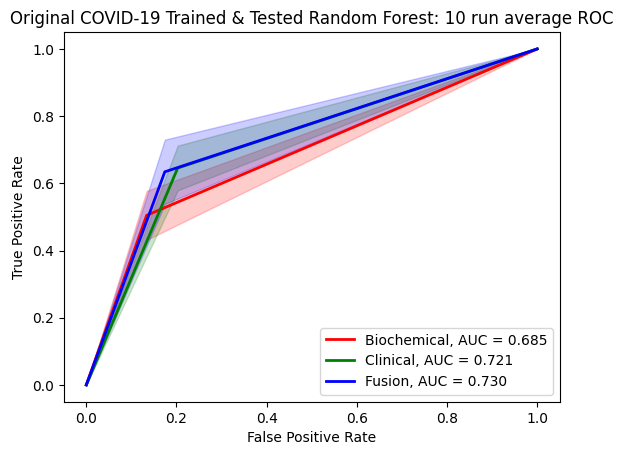

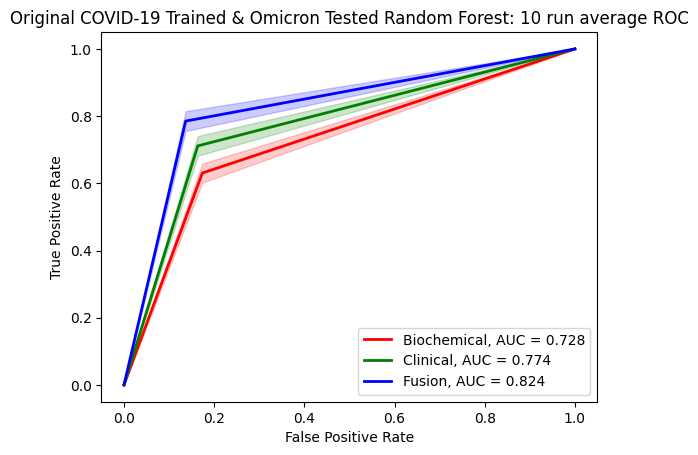

In [ ]:
# ROC Plots---------------------------------------------------------------------
# Plotting the average runs - Original Tested
fig, ax = plt.subplots()
ax.plot(bc_avg_fpr, bc_avg_tpr, label = 'Biochemical, AUC = %.3f'%bc_avg_auc, color='red', linewidth=2)
ax.plot(sy_avg_fpr, sy_avg_tpr, label = 'Clinical, AUC = %.3f'%sy_avg_auc, color='green', linewidth=2)
ax.plot(fn_avg_fpr, fn_avg_tpr, label = 'Fusion, AUC = %.3f'%fn_avg_auc, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bc_avg_fpr, bc_avg_tpr + bc_std_tpr, bc_avg_tpr - bc_std_tpr, alpha=0.2, color='red')
ax.fill_between(sy_avg_fpr, sy_avg_tpr + sy_std_tpr, sy_avg_tpr - sy_std_tpr, alpha=0.2, color='green')
ax.fill_between(fn_avg_fpr, fn_avg_tpr + fn_std_tpr, fn_avg_tpr - fn_std_tpr, alpha=0.2, color='blue')

plt.title(label='Original COVID-19 Trained & Tested Random Forest: 10 run average ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the average runs - Omicron Tested
fig, ax = plt.subplots()
ax.plot(bc_avg_fpr1, bc_avg_tpr1, label = 'Biochemical, AUC = %.3f'%bc_avg_auc1, color='red', linewidth=2)
ax.plot(sy_avg_fpr1, sy_avg_tpr1, label = 'Clinical, AUC = %.3f'%sy_avg_auc1, color='green', linewidth=2)
ax.plot(fn_avg_fpr1, fn_avg_tpr1, label = 'Fusion, AUC = %.3f'%fn_avg_auc1, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bc_avg_fpr1, bc_avg_tpr1 + bc_std_tpr1, bc_avg_tpr1 - bc_std_tpr1, alpha=0.2, color='red')
ax.fill_between(sy_avg_fpr1, sy_avg_tpr1 + sy_std_tpr1, sy_avg_tpr1 - sy_std_tpr1, alpha=0.2, color='green')
ax.fill_between(fn_avg_fpr1, fn_avg_tpr1 + fn_std_tpr1, fn_avg_tpr1 - fn_std_tpr1, alpha=0.2, color='blue')

plt.title(label='Original COVID-19 Trained & Omicron Tested Random Forest: 10 run average ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Omicron Trained Model

---



#### Hyperparameter Tuning, Training, and Prediction

In [ ]:
# Random Forest - Omicron-------------------------------------------------------

print('Omicron Data Runs\n')

# Parameter Grid
tree_range = list(range(1,10))
depth_range = list(range(1,10))
parameters = {'n_estimators': tree_range, 'criterion':('gini', 'entropy', 'log_loss'), 'max_depth': depth_range}

# FPR recordings: 1 - TNR, for plotting ROC
bcO_fpr_runs = [] # Omicron trained and tested
syO_fpr_runs = []
fnO_fpr_runs = []

bcO_fpr_runs1 = [] # Omicron trained and original tested
syO_fpr_runs1 = []
fnO_fpr_runs1 = []

# TPR recordings: Sensitivity, Recall
bcO_tpr_runs = [] # Omicron trained and tested
syO_tpr_runs = []
fnO_tpr_runs = []

bcO_tpr_runs1 = [] # Omicron trained and original tested
syO_tpr_runs1 = []
fnO_tpr_runs1 = []

# TNR recordings: Specificity, Sensitivity
bcO_tnr_runs = [] # Omicron Trained and Tested
syO_tnr_runs = []
fnO_tnr_runs = []

bcO_tnr_runs1 = [] # Omicron Trained and original Tested
syO_tnr_runs1 = []
fnO_tnr_runs1 = []

# AUC recordings
bcO_auc_runs = [] # Omicron trained and tested
syO_auc_runs = []
fnO_auc_runs = []

bcO_auc_runs1 = [] # Omicron trained and original tested
syO_auc_runs1 = []
fnO_auc_runs1 = []

# Coefficient recordings
bcO_coeffs = []
syO_coeffs = []
fnO_coeffs = []

# Best parameter recordings
bcO_params = []
syO_params = []
fnO_params = []

for i in range(n_runs):
  j = i+1
  print('Run: ',j,'------------------------------------\n')

  # Train Test Split------------------------------------------------------------
  bioChemO_train, bioChemO_test, bioChemO_labels_train, bioChemO_labels_test = train_test_split(bioChemO_trim, bioChemO_labels, test_size = 1 / 5)
  sympO_train, sympO_test, sympO_labels_train, sympO_labels_test = train_test_split(sympO_trim, sympO_labels, test_size = 1 / 5)
  multiO_train, multiO_test, multiO_labels_train, multiO_labels_test = train_test_split(multiO_trim, multiO_labels, test_size = 1 / 5)

  # Scaling---------------------------------------------------------------------
  # Biochemical Data
  bioChemO_scaler = StandardScaler()
  bioChemO_train = bioChemO_scaler.fit_transform(bioChemO_train)
  bioChemO_test = bioChemO_scaler.transform(bioChemO_test)

  # Clinical Data
  sympO_scaler = StandardScaler()
  sympO_train = sympO_scaler.fit_transform(sympO_train)
  sympO_test = sympO_scaler.transform(sympO_test)

  # Fusion Data
  multiO_scaler = StandardScaler()
  multiO_train = multiO_scaler.fit_transform(multiO_train)
  multiO_test = multiO_scaler.transform(multiO_test)

   # Model Training Grid Search--------------------------------------------------
  bioChemO_RF = RandomForestClassifier()
  bioChemO_clf = GridSearchCV(bioChemO_RF, parameters)
  bioChemO_clf.fit(bioChemO_train, bioChemO_labels_train)

  # Clinical model
  sympO_RF = RandomForestClassifier()
  sympO_clf = GridSearchCV(sympO_RF, parameters)
  sympO_clf.fit(sympO_train, sympO_labels_train)

  # Fusion model
  multiO_RF = RandomForestClassifier()
  multiO_clf = GridSearchCV(multiO_RF, parameters)
  multiO_clf.fit(multiO_train, multiO_labels_train)

  # View results----------------------------------------------------------------
  target_names = ['Non-Severe COVID', 'Severe COVID']

  # Biochemical results---------------------------------------------------------
  print('Biochemical Results\n')

  # Best estimator
  bcO_params.append(bioChemO_clf.best_params_)

  # Feature Ranking
  # Random Forest Impurity Rankings
  bcO_coeffs.append(bioChemO_clf.best_estimator_.feature_importances_)

  """feature_importance_1 = pd.DataFrame({'Feature': bioChemO_trim.columns, 'Importance': np.abs(bcO_coeffs)})
  print('Feature ranking for severe COVID-19:', feature_importance_1.nlargest(5, 'Importance', keep='all'))

  # Trees feature importance from Mean Decrease in Impurity (MDI) {not adapted for omicron}
  per_imp_bc = permutation_importance(bioChem_clf.best_estimator_, bioChem_test, bioChem_labels_test)
  sorted_imp_bc = per_imp_bc.importances_mean.argsort()
  importances1 = pd.DataFrame(per_imp_bc.importances[sorted_imp_bc].T, columns = bioChem_trim.columns[sorted_imp_bc])

  ax = importances1.plot.box(vert=False, whis=10)
  ax.set_title(" Original (Biochemical) Permutation Importances (Original Tested)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease in accuracy score")
  ax.figure.tight_layout()"""

  # Predicting on testing hold-out data
  bioChemO_labels_predict = bioChemO_clf.predict(bioChemO_test)

  # Predicting on original COIVD-19 data
  bioChem_trim_scale = bioChemO_scaler.transform(bioChem_trim)
  bioChem_labels_predict1 = bioChemO_clf.predict(bioChem_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(bioChemO_labels_test, bioChemO_labels_predict)
  bcO_fpr_runs.append(fpr)
  bcO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(bioChem_labels, bioChem_labels_predict1)
  bcO_fpr_runs1.append(fpr1)
  bcO_tpr_runs1.append(tpr1)

  # AUC
  BCO_roc_auc = metrics.auc(fpr, tpr)
  bcO_auc_runs.append(BCO_roc_auc)

  # AUC - Original
  BCO_roc_auc1 = metrics.auc(fpr1, tpr1)
  bcO_auc_runs1.append(BCO_roc_auc1)

  # Clinical results---------------------------------------------------------
  print('Clinical Results\n')

  # Best estimator
  syO_params.append(sympO_clf.best_params_)

  # Top 5 Clinical features
  # Random Forest Impurity Rankings
  syO_coeffs.append(sympO_clf.best_estimator_.feature_importances_)

  """feature_importance_2 = pd.DataFrame({'Feature': sympO_trim.columns, 'Importance': np.abs(syO_coeffs)})
  print('Feature ranking for severe COVID-19:', feature_importance_2.nlargest(5, 'Importance', keep='all'))

  # Trees feature importance from Mean Decrease in Impurity (MDI) {not adapted for Omicron}
  per_imp_sy = permutation_importance(symp_clf.best_estimator_, symp_test, symp_labels_test)
  sorted_imp_sy = per_imp_sy.importances_mean.argsort()
  importances2 = pd.DataFrame(per_imp_sy.importances[sorted_imp_sy].T, columns = symp_trim.columns[sorted_imp_sy])

  ax = importances2.plot.box(vert=False, whis=10)
  ax.set_title(" Original (Clinical) Permutation Importances (Original Tested)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease in accuracy score")
  ax.figure.tight_layout()"""

  # Predicting on testing hold-out data
  sympO_labels_predict = sympO_clf.predict(sympO_test)

  # Predicting on original COIVD-19 data
  symp_trim_scale = sympO_scaler.transform(symp_trim)
  symp_labels_predict1 = sympO_clf.predict(symp_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(sympO_labels_test, sympO_labels_predict)
  syO_fpr_runs.append(fpr)
  syO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(symp_labels, symp_labels_predict1)
  syO_fpr_runs1.append(fpr1)
  syO_tpr_runs1.append(tpr1)

  # AUC
  SYO_roc_auc = metrics.auc(fpr, tpr)
  syO_auc_runs.append(SYO_roc_auc)

  # AUC - Original
  SYO_roc_auc1 = metrics.auc(fpr1, tpr1)
  syO_auc_runs1.append(SYO_roc_auc1)

  # Fusion results--------------------------------------------------------------
  print('Fusion Results\n')

  # Best estimator
  fnO_params.append(multiO_clf.best_params_)

  # Top 5 Fusion features
  # Random Forest Impurity Rankings
  fnO_coeffs.append(multiO_clf.best_estimator_.feature_importances_)


  """feature_importance_3 = pd.DataFrame({'Feature': multiO_trim.columns, 'Importance': np.abs(fnO_coeffs)})
  print('Feature ranking for severe COVID-19:', feature_importance_3.nlargest(5, 'Importance', keep='all'))

  # Trees feature importance from Mean Decrease in Impurity (MDI) {not adapted for omicron}
  per_imp_fn = permutation_importance(multi_clf.best_estimator_, multi_test, multi_labels_test)
  sorted_imp_fn = per_imp_fn.importances_mean.argsort()
  importances3 = pd.DataFrame(per_imp_fn.importances[sorted_imp_fn].T, columns = multi_trim.columns[sorted_imp_fn])

  ax = importances3.plot.box(vert=False, whis=10)
  ax.set_title(" Original (Fusion) Permutation Importances (Original Tested)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease in accuracy score")
  ax.figure.tight_layout()"""

  # Predicting on testing hold-out data
  multiO_labels_predict = multiO_clf.predict(multiO_test)

  # Predicting on original COIVD-19 data
  multi_trim_scale = multiO_scaler.transform(multi_trim)
  multi_labels_predict1 = multiO_clf.predict(multi_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(multiO_labels_test, multiO_labels_predict)
  fnO_fpr_runs.append(fpr)
  fnO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(multi_labels, multi_labels_predict1)
  fnO_fpr_runs1.append(fpr1)
  fnO_tpr_runs1.append(tpr1)

  # AUC
  FNO_roc_auc = metrics.auc(fpr, tpr)
  fnO_auc_runs.append(FNO_roc_auc)

  # AUC - Original
  FNO_roc_auc1 = metrics.auc(fpr1, tpr1)
  fnO_auc_runs1.append(FNO_roc_auc1)

print(bcO_params)
print(syO_params)
print(fnO_params)

Omicron Data Runs

Run:  1 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  2 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  3 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  4 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  5 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  6 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  7 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  8 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  9 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  10 ------------------------------------

Biochemical Results

Clin

#### Calculating Mean and Standard deviation of metrics

In [ ]:
# Saving TNR = 1 - FPR----------------------------------------------------------
# Omicron tested
bcO_tnr_runs = np.ones((n_runs,3)) - bcO_fpr_runs
syO_tnr_runs = np.ones((n_runs,3)) - syO_fpr_runs
fnO_tnr_runs = np.ones((n_runs,3)) - fnO_fpr_runs

# Original tested
bcO_tnr_runs1 = np.ones((n_runs,3)) - bcO_fpr_runs1
syO_tnr_runs1 = np.ones((n_runs,3)) - syO_fpr_runs1
fnO_tnr_runs1 = np.ones((n_runs,3)) - fnO_fpr_runs1

# Averaging over multiple runs--------------------------------------------------
# FPR
bcO_avg_fpr = np.mean(bcO_fpr_runs, axis=0)
syO_avg_fpr = np.mean(syO_fpr_runs, axis=0)
fnO_avg_fpr = np.mean(fnO_fpr_runs, axis=0)

# FPR - Original
bcO_avg_fpr1 = np.mean(bcO_fpr_runs1, axis=0)
syO_avg_fpr1 = np.mean(syO_fpr_runs1, axis=0)
fnO_avg_fpr1 = np.mean(fnO_fpr_runs1, axis=0)

# TPR
bcO_avg_tpr = np.mean(bcO_tpr_runs, axis=0)
syO_avg_tpr = np.mean(syO_tpr_runs, axis=0)
fnO_avg_tpr = np.mean(fnO_tpr_runs, axis=0)

# TPR - Original
bcO_avg_tpr1 = np.mean(bcO_tpr_runs1, axis=0)
syO_avg_tpr1 = np.mean(syO_tpr_runs1, axis=0)
fnO_avg_tpr1 = np.mean(fnO_tpr_runs1, axis=0)

# TNR
bcO_avg_tnr = np.mean(bcO_tnr_runs, axis=0)
syO_avg_tnr = np.mean(syO_tnr_runs, axis=0)
fnO_avg_tnr = np.mean(fnO_tnr_runs, axis=0)

# TNR - Original
bcO_avg_tnr1 = np.mean(bcO_tnr_runs1, axis=0)
syO_avg_tnr1 = np.mean(syO_tnr_runs1, axis=0)
fnO_avg_tnr1 = np.mean(fnO_tnr_runs1, axis=0)

# AUC
bcO_avg_auc = np.mean(bcO_auc_runs)
syO_avg_auc = np.mean(syO_auc_runs)
fnO_avg_auc = np.mean(fnO_auc_runs)

# AUC - Original
bcO_avg_auc1 = np.mean(bcO_auc_runs1)
syO_avg_auc1 = np.mean(syO_auc_runs1)
fnO_avg_auc1 = np.mean(fnO_auc_runs1)

# Standard Deviation of ROC plots-----------------------------------------------
# FPR
bcO_std_fpr = np.std(bcO_fpr_runs, axis=0)
syO_std_fpr = np.std(syO_fpr_runs, axis=0)
fnO_std_fpr = np.std(fnO_fpr_runs, axis=0)

# FPR - Original
bcO_std_fpr1 = np.std(bcO_fpr_runs1, axis=0)
syO_std_fpr1 = np.std(syO_fpr_runs1, axis=0)
fnO_std_fpr1 = np.std(fnO_fpr_runs1, axis=0)

# TPR
bcO_std_tpr = np.std(bcO_tpr_runs, axis=0)
syO_std_tpr = np.std(syO_tpr_runs, axis=0)
fnO_std_tpr = np.std(fnO_tpr_runs, axis=0)

# TPR - Original
bcO_std_tpr1 = np.std(bcO_tpr_runs1, axis=0)
syO_std_tpr1 = np.std(syO_tpr_runs1, axis=0)
fnO_std_tpr1 = np.std(fnO_tpr_runs1, axis=0)

# Averaging coefficients--------------------------------------------------------
bcO_mean_coeffs = np.mean(bcO_coeffs, axis=0)
syO_mean_coeffs = np.mean(syO_coeffs, axis=0)
fnO_mean_coeffs = np.mean(fnO_coeffs, axis=0)

# Printing Results--------------------------------------------------------------
# FPR
print('Mean FPR, omicron/omicron, BC: ', bcO_avg_fpr)
print('Mean FPR, omicron/omicron, SY: ', syO_avg_fpr)
print('Mean FPR, omicron/omicron, FN: ', fnO_avg_fpr)

# FPR - Original
print('Mean FPR, omicron/original, BC: ', bcO_avg_fpr1)
print('Mean FPR, omicron/original, SY: ', syO_avg_fpr1)
print('Mean FPR, omicron/original, FN: ', fnO_avg_fpr1)

print('\n')

# TPR
print('Mean TPR, omicron/omicron, BC: ', bcO_avg_tpr)
print('Mean TPR, omicron/omicron, SY: ', syO_avg_tpr)
print('Mean TPR, omicron/omicron, FN: ', fnO_avg_tpr)

# TPR - Original
print('Mean TPR, omicron/original, BC: ', bcO_avg_tpr1)
print('Mean TPR, omicron/original, SY: ', syO_avg_tpr1)
print('Mean TPR, omicron/original, FN: ', fnO_avg_tpr1)

print('\n')

# TNR
print('Mean TNR, omicron/omicron, BC: ', bcO_avg_tnr)
print('Mean TNR, omicron/omicron, SY: ', syO_avg_tnr)
print('Mean TNR, omicron/omicron, FN: ', fnO_avg_tnr)

# TNR - Original
print('Mean TNR, omicron/original, BC: ', bcO_avg_tnr1)
print('Mean TNR, omicron/original, SY: ', syO_avg_tnr1)
print('Mean TNR, omicron/original, FN: ', fnO_avg_tnr1)

print('\n')

# AUC
print('AUC of biochem composite ROC curve',metrics.auc(bcO_avg_fpr, bcO_avg_tpr))
print('AUC of symp composite ROC curve',metrics.auc(syO_avg_fpr, syO_avg_tpr))
print('AUC of fusion composite ROC curve',metrics.auc(fnO_avg_fpr, fnO_avg_tpr))

# AUC - Original
print('AUC of biochem composite ROC curve (Original)',metrics.auc(bcO_avg_fpr1, bcO_avg_tpr1))
print('AUC of symp composite ROC curve (Original)',metrics.auc(syO_avg_fpr1, syO_avg_tpr1))
print('AUC of fusion composite ROC curve (Original)',metrics.auc(fnO_avg_fpr1, fnO_avg_tpr1))

Mean FPR, omicron/omicron, BC:  [0.         0.12313599 1.        ]
Mean FPR, omicron/omicron, SY:  [0.         0.22674024 1.        ]
Mean FPR, omicron/omicron, FN:  [0.         0.10246537 1.        ]
Mean FPR, omicron/original, BC:  [0.         0.23925234 1.        ]
Mean FPR, omicron/original, SY:  [0.         0.26542056 1.        ]
Mean FPR, omicron/original, FN:  [0.         0.23084112 1.        ]


Mean TPR, omicron/omicron, BC:  [0.         0.87495844 1.        ]
Mean TPR, omicron/omicron, SY:  [0.         0.80325826 1.        ]
Mean TPR, omicron/omicron, FN:  [0.         0.89479508 1.        ]
Mean TPR, omicron/original, BC:  [0.         0.71554054 1.        ]
Mean TPR, omicron/original, SY:  [0.         0.78378378 1.        ]
Mean TPR, omicron/original, FN:  [0.         0.76486486 1.        ]


Mean TNR, omicron/omicron, BC:  [1.         0.87686401 0.        ]
Mean TNR, omicron/omicron, SY:  [1.         0.77325976 0.        ]
Mean TNR, omicron/omicron, FN:  [1.         0.897534

#### Displaying ROC Plots and AUC

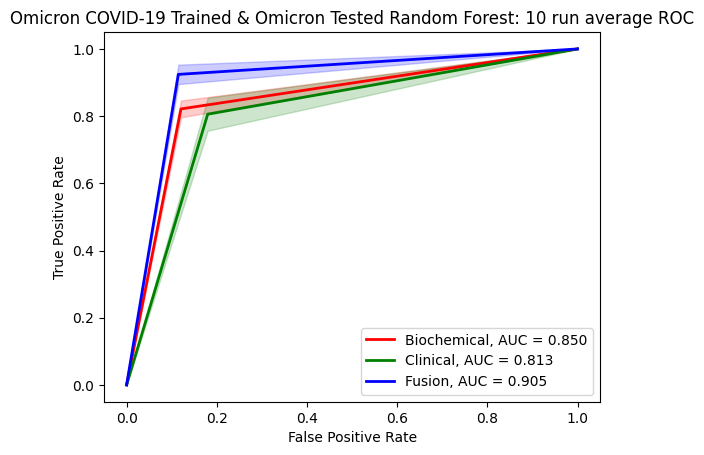

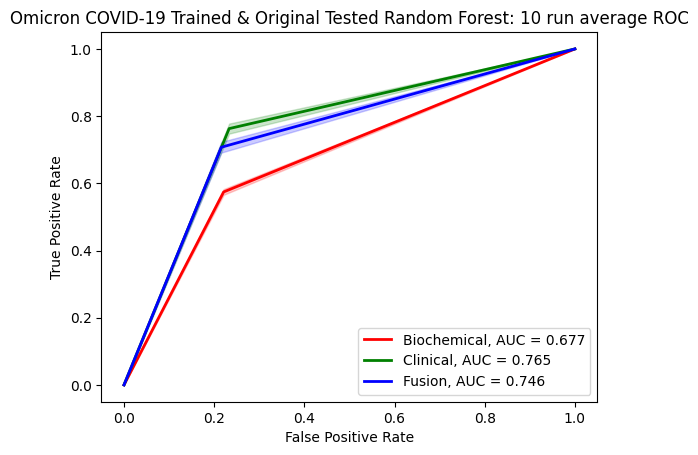

In [ ]:
# ROC Plots---------------------------------------------------------------------
# Plotting the average runs - Omicron Tested
fig, ax = plt.subplots()
ax.plot(bcO_avg_fpr, bcO_avg_tpr, label = 'Biochemical, AUC = %.3f'%bcO_avg_auc, color='red', linewidth=2)
ax.plot(syO_avg_fpr, syO_avg_tpr, label = 'Clinical, AUC = %.3f'%syO_avg_auc, color='green', linewidth=2)
ax.plot(fnO_avg_fpr, fnO_avg_tpr, label = 'Fusion, AUC = %.3f'%fnO_avg_auc, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bcO_avg_fpr, bcO_avg_tpr + bcO_std_tpr, bcO_avg_tpr - bcO_std_tpr, alpha=0.2, color='red')
ax.fill_between(syO_avg_fpr, syO_avg_tpr + syO_std_tpr, syO_avg_tpr - syO_std_tpr, alpha=0.2, color='green')
ax.fill_between(fnO_avg_fpr, fnO_avg_tpr + fnO_std_tpr, fnO_avg_tpr - fnO_std_tpr, alpha=0.2, color='blue')

plt.title(label='Omicron COVID-19 Trained & Omicron Tested Random Forest: 10 run average ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the average runs - Original Tested
fig, ax = plt.subplots()
ax.plot(bcO_avg_fpr1, bcO_avg_tpr1, label = 'Biochemical, AUC = %.3f'%bcO_avg_auc1, color='red', linewidth=2)
ax.plot(syO_avg_fpr1, syO_avg_tpr1, label = 'Clinical, AUC = %.3f'%syO_avg_auc1, color='green', linewidth=2)
ax.plot(fnO_avg_fpr1, fnO_avg_tpr1, label = 'Fusion, AUC = %.3f'%fnO_avg_auc1, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bcO_avg_fpr1, bcO_avg_tpr1 + bcO_std_tpr1, bcO_avg_tpr1 - bcO_std_tpr1, alpha=0.2, color='red')
ax.fill_between(syO_avg_fpr1, syO_avg_tpr1 + syO_std_tpr1, syO_avg_tpr1 - syO_std_tpr1, alpha=0.2, color='green')
ax.fill_between(fnO_avg_fpr1, fnO_avg_tpr1 + fnO_std_tpr1, fnO_avg_tpr1 - fnO_std_tpr1, alpha=0.2, color='blue')

plt.title(label='Omicron COVID-19 Trained & Original Tested Random Forest: 10 run average ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Feature Importance

Text(0.5, 1.0, 'Omicron (Fusion) Trained Random Forest Ranked Features: 10 run average')

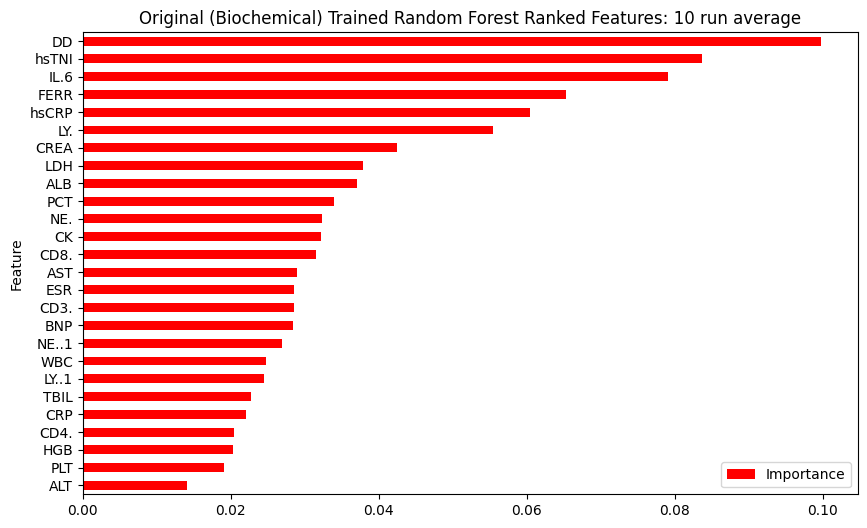

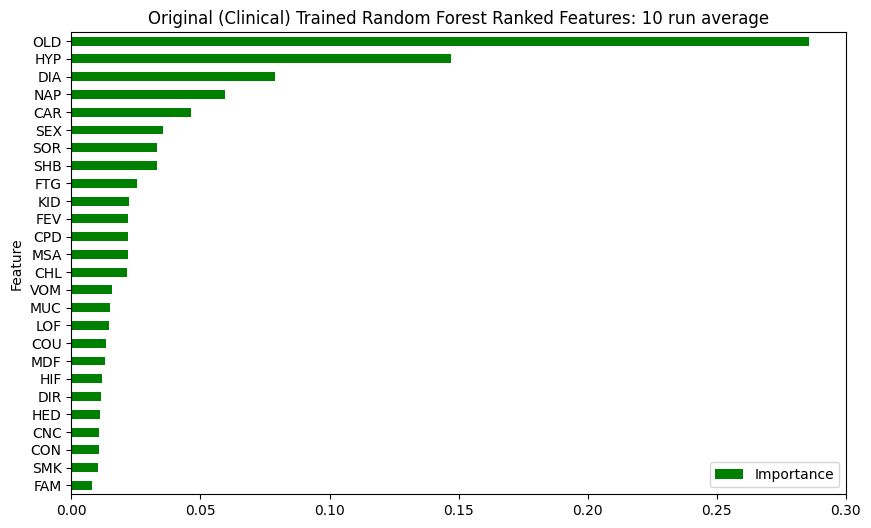

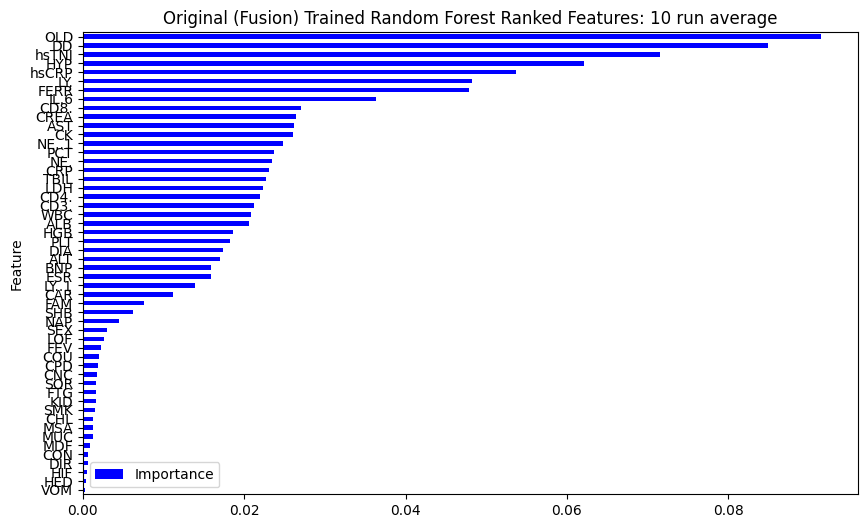

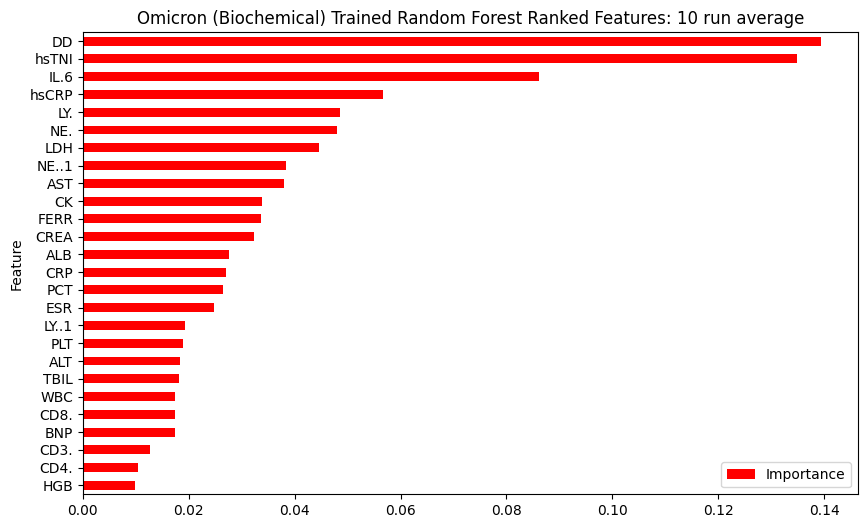

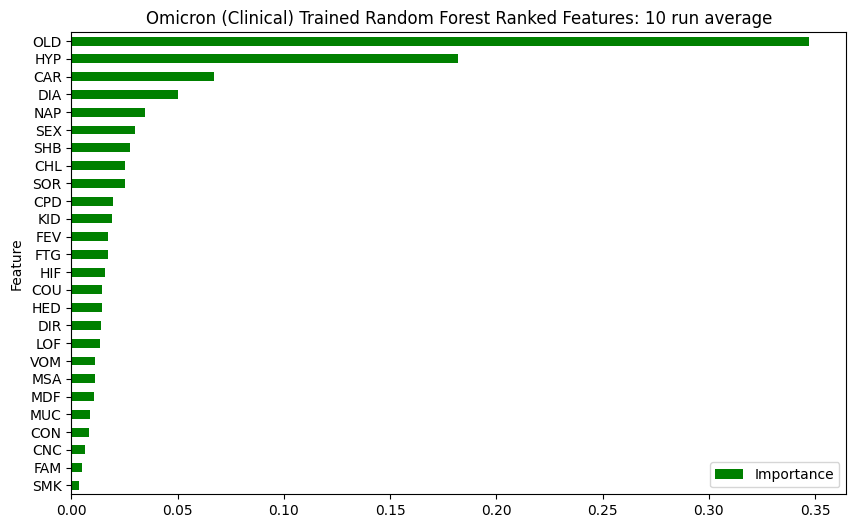

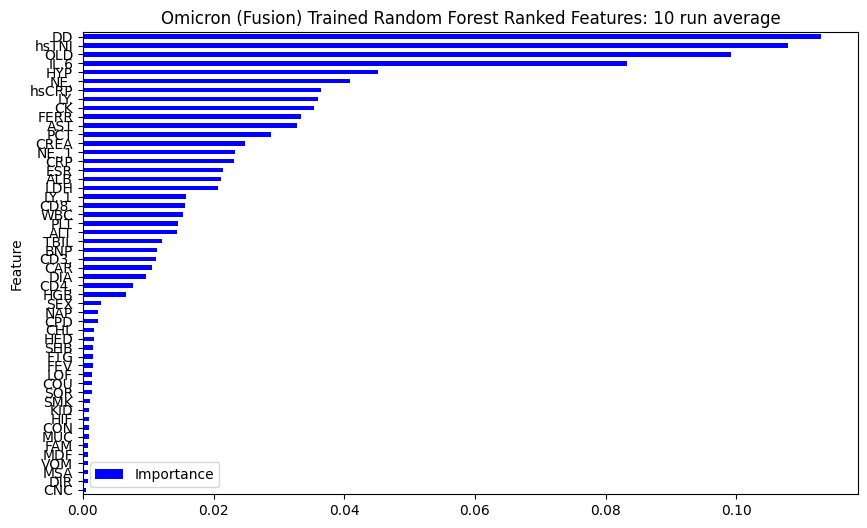

In [ ]:
# Original COVID-19 Data--------------------------------------------------------

# Best Coefficients of Biochemical Models
feature_importance = pd.DataFrame({'Feature': bioChem_trim.columns, 'Importance': bc_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='red', figsize=(10, 6))
plt.title(label='Original (Biochemical) Trained Random Forest Ranked Features: 10 run average')

# Best Coefficients of Clinical Models
feature_importance = pd.DataFrame({'Feature': symp_trim.columns, 'Importance':sy_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='green', figsize=(10, 6))
plt.title(label='Original (Clinical) Trained Random Forest Ranked Features: 10 run average')

# Best Coefficients of Fusion Models
feature_importance = pd.DataFrame({'Feature': multi_trim.columns, 'Importance': fn_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='blue', figsize=(10, 6))
plt.title(label='Original (Fusion) Trained Random Forest Ranked Features: 10 run average')

# Omicron COVID-19 Data--------------------------------------------------------

# Best Coefficients of Biochemical Models
feature_importance = pd.DataFrame({'Feature': bioChemO_trim.columns, 'Importance': bcO_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='red', figsize=(10, 6))
plt.title(label='Omicron (Biochemical) Trained Random Forest Ranked Features: 10 run average')

# Best Coefficients of Clinical Models
feature_importance = pd.DataFrame({'Feature': sympO_trim.columns, 'Importance': syO_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='green', figsize=(10, 6))
plt.title(label='Omicron (Clinical) Trained Random Forest Ranked Features: 10 run average')

# Best Coefficients of Fusion Models
feature_importance = pd.DataFrame({'Feature': multiO_trim.columns, 'Importance': fnO_mean_coeffs})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', color='blue', figsize=(10, 6))
plt.title(label='Omicron (Fusion) Trained Random Forest Ranked Features: 10 run average')

## k-Nearest Neighbors



### Original Trained Model

---



#### Hyperparameter Tuning, Training, and Prediction

In [ ]:
# k Nearest Neighbors - Original------------------------------------------------

print('Original Data Runs\n')

# Parameter Grid
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights':('uniform', 'distance'), 'metric':('l1', 'l2', 'cosine')}

# FPR recordings: 1-TNR, for plotting AUC
bc_fpr_runs = [] # Original Trained and Tested
sy_fpr_runs = []
fn_fpr_runs = []

bc_fpr_runs1 = [] # Original Trained and Omicron Tested
sy_fpr_runs1 = []
fn_fpr_runs1 = []

# TPR recordings: Sensitivity, Recall
bc_tpr_runs = [] # Original Trained and Tested
sy_tpr_runs = []
fn_tpr_runs = []

bc_tpr_runs1 = [] # Original Trained and Omicron Tested
sy_tpr_runs1 = []
fn_tpr_runs1 = []

# TNR recordings: Specificity, Sensitivity
bc_tnr_runs = [] # Original Trained and Tested
sy_tnr_runs = []
fn_tnr_runs = []

bc_tnr_runs1 = [] # Original Trained and Omicron Tested
sy_tnr_runs1 = []
fn_tnr_runs1 = []

# AUC recordings
bc_auc_runs = [] # Original Trained and Tested
sy_auc_runs = []
fn_auc_runs = []

bc_auc_runs1 = [] # Original Trained and Omicron Tested
sy_auc_runs1 = []
fn_auc_runs1 = []

# Best parameter recordings
bc_params = []
sy_params = []
fn_params = []

for i in range(n_runs):
  j = i+1
  print('Run: ',j,'------------------------------------\n')

  # Train Test Split------------------------------------------------------------
  bioChem_train, bioChem_test, bioChem_labels_train, bioChem_labels_test = train_test_split(bioChem_trim, bioChem_labels, test_size = 1 / 5)
  symp_train, symp_test, symp_labels_train, symp_labels_test = train_test_split(symp_trim, symp_labels, test_size = 1 / 5)
  multi_train, multi_test, multi_labels_train, multi_labels_test = train_test_split(multi_trim, multi_labels, test_size = 1 / 5)

  # Scaling---------------------------------------------------------------------
  # Biochemical Data
  bioChem_scaler = StandardScaler()
  bioChem_train = bioChem_scaler.fit_transform(bioChem_train)
  bioChem_test = bioChem_scaler.transform(bioChem_test)

  # Clinical Data
  symp_scaler = StandardScaler()
  symp_train = symp_scaler.fit_transform(symp_train)
  symp_test = symp_scaler.transform(symp_test)

  # Fusion Data
  multi_scaler = StandardScaler()
  multi_train = multi_scaler.fit_transform(multi_train)
  multi_test = multi_scaler.transform(multi_test)

  # Model Training Grid Search--------------------------------------------------
  # Biochemical model
  bioChem_kNN = KNeighborsClassifier()
  bioChem_clf = GridSearchCV(bioChem_kNN, parameters)
  bioChem_clf.fit(bioChem_train, bioChem_labels_train)

  # Clinical model
  symp_kNN = KNeighborsClassifier()
  symp_clf = GridSearchCV(symp_kNN, parameters)
  symp_clf.fit(symp_train, symp_labels_train)

  # Fusion model
  multi_kNN = KNeighborsClassifier()
  multi_clf = GridSearchCV(multi_kNN, parameters)
  multi_clf.fit(multi_train, multi_labels_train)

  # View results----------------------------------------------------------------
  target_names = ['Non-Severe COVID', 'Severe COVID']

  # Biochemical results---------------------------------------------------------
  print('Biochemical Results\n')

  # Best estimator
  bc_params.append(bioChem_clf.best_params_)

  # Predicting on testing hold-out data
  bioChem_labels_predict = bioChem_clf.predict(bioChem_test)

  # Predicting on Omicron Data
  bioChemO_trim_scale = bioChem_scaler.transform(bioChemO_trim)
  bioChemO_labels_predict = bioChem_clf.predict(bioChemO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(bioChem_labels_test, bioChem_labels_predict)
  bc_fpr_runs.append(fpr)
  bc_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(bioChemO_labels, bioChemO_labels_predict)
  bc_fpr_runs1.append(fpr1)
  bc_tpr_runs1.append(tpr1)

  # AUC
  BC_roc_auc = metrics.auc(fpr, tpr)
  bc_auc_runs.append(BC_roc_auc)

  # AUC - Omicron
  BC_roc_auc1 = metrics.auc(fpr1, tpr1)
  bc_auc_runs1.append(BC_roc_auc1)

  # Clinical results------------------------------------------------------------
  print('Clinical Results\n')

  # Best estimator
  sy_params.append(symp_clf.best_params_)

  # Predicting on testing hold-out data
  symp_labels_predict = symp_clf.predict(symp_test)

  # Predicting on Omicron Data
  sympO_trim_scale = symp_scaler.transform(sympO_trim)
  sympO_labels_predict = symp_clf.predict(sympO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(symp_labels_test, symp_labels_predict)
  sy_fpr_runs.append(fpr)
  sy_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(sympO_labels,sympO_labels_predict)
  sy_fpr_runs1.append(fpr1)
  sy_tpr_runs1.append(tpr1)

  # AUC
  SY_roc_auc = metrics.auc(fpr, tpr)
  sy_auc_runs.append(SY_roc_auc)

  # AUC - Omicron
  SY_roc_auc1 = metrics.auc(fpr1, tpr1)
  sy_auc_runs1.append(SY_roc_auc1)

  # Fusion results--------------------------------------------------------------
  print('Fusion Results\n')

  # Best estimator
  fn_params.append(multi_clf.best_params_)

  # Predicting on testing hold-out data
  multi_labels_predict = multi_clf.predict(multi_test)

  # Predicting on Omicron Data
  multiO_trim_scale = multi_scaler.transform(multiO_trim)
  multiO_labels_predict = multi_clf.predict(multiO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(multi_labels_test, multi_labels_predict)
  fn_fpr_runs.append(fpr)
  fn_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(multiO_labels, multiO_labels_predict)
  fn_fpr_runs1.append(fpr1)
  fn_tpr_runs1.append(tpr1)

  # AUC
  FN_roc_auc = metrics.auc(fpr, tpr)
  fn_auc_runs.append(FN_roc_auc)

  # AUC - Omicron
  FN_roc_auc1 = metrics.auc(fpr1, tpr1)
  fn_auc_runs1.append(FN_roc_auc1)

print(bc_params)
print(sy_params)
print(fn_params)

Original Data Runs

Run:  1 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  2 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  3 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  4 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  5 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  6 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  7 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  8 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  9 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  10 ------------------------------------

Biochemical Results

Cli

#### Calculating Mean and Standard deviation of metrics

In [ ]:
# Saving TNR = 1 - FPR----------------------------------------------------------
# Original tested
bc_tnr_runs = np.ones((n_runs,3)) - bc_fpr_runs
sy_tnr_runs = np.ones((n_runs,3)) - sy_fpr_runs
fn_tnr_runs = np.ones((n_runs,3)) - fn_fpr_runs

# Omicron tested
bc_tnr_runs1 = np.ones((n_runs,3)) - bc_fpr_runs1
sy_tnr_runs1 = np.ones((n_runs,3)) - sy_fpr_runs1
fn_tnr_runs1 = np.ones((n_runs,3)) - fn_fpr_runs1

# Averaging over multiple runs--------------------------------------------------
# FPR
bc_avg_fpr = np.mean(bc_fpr_runs, axis=0)
sy_avg_fpr = np.mean(sy_fpr_runs, axis=0)
fn_avg_fpr = np.mean(fn_fpr_runs, axis=0)

# FPR - Omicron
bc_avg_fpr1 = np.mean(bc_fpr_runs1, axis=0)
sy_avg_fpr1 = np.mean(sy_fpr_runs1, axis=0)
fn_avg_fpr1 = np.mean(fn_fpr_runs1, axis=0)

# TPR
bc_avg_tpr = np.mean(bc_tpr_runs, axis=0)
sy_avg_tpr = np.mean(sy_tpr_runs, axis=0)
fn_avg_tpr = np.mean(fn_tpr_runs, axis=0)

# TPR - Omicron
bc_avg_tpr1 = np.mean(bc_tpr_runs1, axis=0)
sy_avg_tpr1 = np.mean(sy_tpr_runs1, axis=0)
fn_avg_tpr1 = np.mean(fn_tpr_runs1, axis=0)

# TNR
bc_avg_tnr = np.mean(bc_tnr_runs, axis=0)
sy_avg_tnr = np.mean(sy_tnr_runs, axis=0)
fn_avg_tnr = np.mean(fn_tnr_runs, axis=0)

# TNR - Omicron
bc_avg_tnr1 = np.mean(bc_tnr_runs1, axis=0)
sy_avg_tnr1 = np.mean(sy_tnr_runs1, axis=0)
fn_avg_tnr1 = np.mean(fn_tnr_runs1, axis=0)

# AUC
bc_avg_auc = np.mean(bc_auc_runs)
sy_avg_auc = np.mean(sy_auc_runs)
fn_avg_auc = np.mean(fn_auc_runs)

# AUC - Omicron
bc_avg_auc1 = np.mean(bc_auc_runs1)
sy_avg_auc1 = np.mean(sy_auc_runs1)
fn_avg_auc1 = np.mean(fn_auc_runs1)

# Standard Deviation of ROC plots-----------------------------------------------
# FPR
bc_std_fpr = np.std(bc_fpr_runs, axis=0)
sy_std_fpr = np.std(sy_fpr_runs, axis=0)
fn_std_fpr = np.std(fn_fpr_runs, axis=0)

# FPR - Omicron
bc_std_fpr1 = np.std(bc_fpr_runs1, axis=0)
sy_std_fpr1 = np.std(sy_fpr_runs1, axis=0)
fn_std_fpr1 = np.std(fn_fpr_runs1, axis=0)

# TPR
bc_std_tpr = np.std(bc_tpr_runs, axis=0)
sy_std_tpr = np.std(sy_tpr_runs, axis=0)
fn_std_tpr = np.std(fn_tpr_runs, axis=0)

# TPR - Omicron
bc_std_tpr1 = np.std(bc_tpr_runs1, axis=0)
sy_std_tpr1 = np.std(sy_tpr_runs1, axis=0)
fn_std_tpr1 = np.std(fn_tpr_runs1, axis=0)

# Printing Results--------------------------------------------------------------
# FPR
print('Mean FPR, original/original, BC: ', bc_avg_fpr)
print('Mean FPR, original/original, SY: ', sy_avg_fpr)
print('Mean FPR, original/original, FN: ', fn_avg_fpr)

# FPR - Omicron
print('Mean FPR, original/omicron, BC: ', bc_avg_fpr1)
print('Mean FPR, original/omicron, SY: ', sy_avg_fpr1)
print('Mean FPR, original/omicron, FN: ', fn_avg_fpr1)

print('\n')

# TPR
print('Mean TPR, original/original, BC: ', bc_avg_tpr)
print('Mean TPR, original/original, SY: ', sy_avg_tpr)
print('Mean TPR, original/original, FN: ', fn_avg_tpr)

# TPR - Omicron
print('Mean TPR, original/omicron, BC: ', bc_avg_tpr1)
print('Mean TPR, original/omicron, SY: ', sy_avg_tpr1)
print('Mean TPR, original/omicron, FN: ', fn_avg_tpr1)

print('\n')

# TNR
print('Mean TNR, original/original, BC: ', bc_avg_tnr)
print('Mean TNR, original/original, SY: ', sy_avg_tnr)
print('Mean TNR, original/original, FN: ', fn_avg_tnr)

# TNR - Omicron
print('Mean TNR, original/omicron, BC: ', bc_avg_tnr1)
print('Mean TNR, original/omicron, SY: ', sy_avg_tnr1)
print('Mean TNR, original/omicron, FN: ', fn_avg_tnr1)

print('\n')

# AUC
print('AUC of biochem composite ROC curve',metrics.auc(bc_avg_fpr, bc_avg_tpr))
print('AUC of symp composite ROC curve',metrics.auc(sy_avg_fpr, sy_avg_tpr))
print('AUC of fusion composite ROC curve',metrics.auc(fn_avg_fpr, fn_avg_tpr))

# AUC - Omicron
print('AUC of biochem composite ROC curve (Omicron)',metrics.auc(bc_avg_fpr1, bc_avg_tpr1))
print('AUC of symp composite ROC curve (Omicron)',metrics.auc(sy_avg_fpr1, sy_avg_tpr1))
print('AUC of fusion composite ROC curve (Omicron)',metrics.auc(fn_avg_fpr1, fn_avg_tpr1))

Mean FPR, original/original, BC:  [0.         0.19625917 1.        ]
Mean FPR, original/original, SY:  [0.        0.1302969 1.       ]
Mean FPR, original/original, FN:  [0.         0.16157995 1.        ]
Mean FPR, original/omicron, BC:  [0.     0.1202 1.    ]
Mean FPR, original/omicron, SY:  [0.    0.158 1.   ]
Mean FPR, original/omicron, FN:  [0.     0.0982 1.    ]


Mean TPR, original/original, BC:  [0.         0.41736961 1.        ]
Mean TPR, original/original, SY:  [0.         0.55001864 1.        ]
Mean TPR, original/original, FN:  [0.         0.56197081 1.        ]
Mean TPR, original/omicron, BC:  [0.    0.531 1.   ]
Mean TPR, original/omicron, SY:  [0.    0.601 1.   ]
Mean TPR, original/omicron, FN:  [0.     0.7072 1.    ]


Mean TNR, original/original, BC:  [1.         0.80374083 0.        ]
Mean TNR, original/original, SY:  [1.        0.8697031 0.       ]
Mean TNR, original/original, FN:  [1.         0.83842005 0.        ]
Mean TNR, original/omicron, BC:  [1.     0.8798 0.    

#### Displaying ROC Plots and AUC

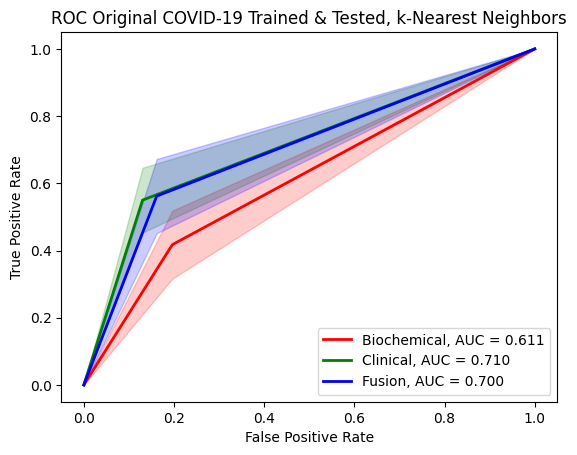

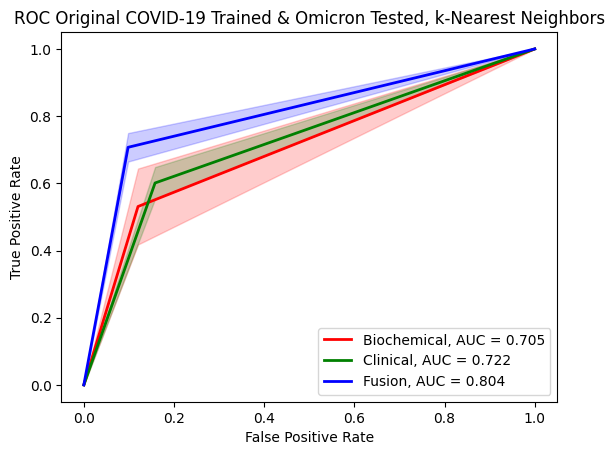

In [ ]:
# ROC Plots---------------------------------------------------------------------
# Plotting the average runs - Original Tested
fig, ax = plt.subplots()
ax.plot(bc_avg_fpr, bc_avg_tpr, label = 'Biochemical, AUC = %.3f'%bc_avg_auc, color='red', linewidth=2)
ax.plot(sy_avg_fpr, sy_avg_tpr, label = 'Clinical, AUC = %.3f'%sy_avg_auc, color='green', linewidth=2)
ax.plot(fn_avg_fpr, fn_avg_tpr, label = 'Fusion, AUC = %.3f'%fn_avg_auc, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bc_avg_fpr, bc_avg_tpr + bc_std_tpr, bc_avg_tpr - bc_std_tpr, alpha=0.2, color='red')
ax.fill_between(sy_avg_fpr, sy_avg_tpr + sy_std_tpr, sy_avg_tpr - sy_std_tpr, alpha=0.2, color='green')
ax.fill_between(fn_avg_fpr, fn_avg_tpr + fn_std_tpr, fn_avg_tpr - fn_std_tpr, alpha=0.2, color='blue')

plt.title(label='ROC Original COVID-19 Trained & Tested, k-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the average runs - Omicron Tested
fig, ax = plt.subplots()
ax.plot(bc_avg_fpr1, bc_avg_tpr1, label = 'Biochemical, AUC = %.3f'%bc_avg_auc1, color='red', linewidth=2)
ax.plot(sy_avg_fpr1, sy_avg_tpr1, label = 'Clinical, AUC = %.3f'%sy_avg_auc1, color='green', linewidth=2)
ax.plot(fn_avg_fpr1, fn_avg_tpr1, label = 'Fusion, AUC = %.3f'%fn_avg_auc1, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bc_avg_fpr1, bc_avg_tpr1 + bc_std_tpr1, bc_avg_tpr1 - bc_std_tpr1, alpha=0.2, color='red')
ax.fill_between(sy_avg_fpr1, sy_avg_tpr1 + sy_std_tpr1, sy_avg_tpr1 - sy_std_tpr1, alpha=0.2, color='green')
ax.fill_between(fn_avg_fpr1, fn_avg_tpr1 + fn_std_tpr1, fn_avg_tpr1 - fn_std_tpr1, alpha=0.2, color='blue')

plt.title(label='ROC Original COVID-19 Trained & Omicron Tested, k-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Omicron Trained Model

---



#### Hyperparameter Tuning, Training, and Prediction



In [ ]:
# k Nearest Neighbors - Omicron-------------------------------------------------

print('Omicron Data Runs\n')

# Parameter Grid
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights':('uniform', 'distance'), 'metric':('l1', 'l2', 'cosine')}

# FPR recordings: 1 - TNR, for plotting ROC
bcO_fpr_runs = [] # Omicron trained and tested
syO_fpr_runs = []
fnO_fpr_runs = []

bcO_fpr_runs1 = [] # Omicron trained and original tested
syO_fpr_runs1 = []
fnO_fpr_runs1 = []

# TPR recordings: Sensitivity, Recall
bcO_tpr_runs = [] # Omicron trained and tested
syO_tpr_runs = []
fnO_tpr_runs = []

bcO_tpr_runs1 = [] # Omicron trained and original tested
syO_tpr_runs1 = []
fnO_tpr_runs1 = []

# TNR recordings: Specificity, Sensitivity
bcO_tnr_runs = [] # Omicron Trained and Tested
syO_tnr_runs = []
fnO_tnr_runs = []

bcO_tnr_runs1 = [] # Omicron Trained and original Tested
syO_tnr_runs1 = []
fnO_tnr_runs1 = []

# AUC recordings
bcO_auc_runs = [] # Omicron trained and tested
syO_auc_runs = []
fnO_auc_runs = []

bcO_auc_runs1 = [] # Omicron trained and original tested
syO_auc_runs1 = []
fnO_auc_runs1 = []

# Best parameter recordings
bcO_params = []
syO_params = []
fnO_params = []

for i in range(n_runs):
  j = i+1
  print('Run: ',j,'------------------------------------\n')

  # Train Test Split------------------------------------------------------------
  bioChemO_train, bioChemO_test, bioChemO_labels_train, bioChemO_labels_test = train_test_split(bioChemO_trim, bioChemO_labels, test_size = 1 / 5)
  sympO_train, sympO_test, sympO_labels_train, sympO_labels_test = train_test_split(sympO_trim, sympO_labels, test_size = 1 / 5)
  multiO_train, multiO_test, multiO_labels_train, multiO_labels_test = train_test_split(multiO_trim, multiO_labels, test_size = 1 / 5)

  # Scaling---------------------------------------------------------------------
  # Biochemical Data
  bioChemO_scaler = StandardScaler()
  bioChemO_train = bioChemO_scaler.fit_transform(bioChemO_train)
  bioChemO_test = bioChemO_scaler.transform(bioChemO_test)

  # Clinical Data
  sympO_scaler = StandardScaler()
  sympO_train = sympO_scaler.fit_transform(sympO_train)
  sympO_test = sympO_scaler.transform(sympO_test)

  # Fusion Data
  multiO_scaler = StandardScaler()
  multiO_train = multiO_scaler.fit_transform(multiO_train)
  multiO_test = multiO_scaler.transform(multiO_test)

  # Model Training Grid Search--------------------------------------------------
  bioChemO_kNN = KNeighborsClassifier()
  bioChemO_clf = GridSearchCV(bioChemO_kNN, parameters)
  bioChemO_clf.fit(bioChemO_train, bioChemO_labels_train)

  # Clinical model
  sympO_kNN = KNeighborsClassifier()
  sympO_clf = GridSearchCV(sympO_kNN, parameters)
  sympO_clf.fit(sympO_train, sympO_labels_train)

  # Fusion model
  multiO_kNN = KNeighborsClassifier()
  multiO_clf = GridSearchCV(multiO_kNN, parameters)
  multiO_clf.fit(multiO_train, multiO_labels_train)

  # View results----------------------------------------------------------------
  target_names = ['Non-Severe COVID', 'Severe COVID']

  # Biochemical results---------------------------------------------------------
  print('Biochemical Results\n')

  # Best estimator
  bcO_params.append(bioChemO_clf.best_params_)

  # Predicting on testing hold-out data
  bioChemO_labels_predict = bioChemO_clf.predict(bioChemO_test)

  # Predicting on original COIVD-19 data
  bioChem_trim_scale = bioChemO_scaler.transform(bioChem_trim)
  bioChem_labels_predict1 = bioChemO_clf.predict(bioChem_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(bioChemO_labels_test, bioChemO_labels_predict)
  bcO_fpr_runs.append(fpr)
  bcO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(bioChem_labels, bioChem_labels_predict1)
  bcO_fpr_runs1.append(fpr1)
  bcO_tpr_runs1.append(tpr1)

  # AUC
  BCO_roc_auc = metrics.auc(fpr, tpr)
  bcO_auc_runs.append(BCO_roc_auc)

  # AUC - Original
  BCO_roc_auc1 = metrics.auc(fpr1, tpr1)
  bcO_auc_runs1.append(BCO_roc_auc1)

  # Clinical results---------------------------------------------------------
  print('Clinical Results\n')

  # Best estimator
  syO_params.append(sympO_clf.best_params_)

  # Predicting on testing hold-out data
  sympO_labels_predict = sympO_clf.predict(sympO_test)

  # Predicting on original COIVD-19 data
  symp_trim_scale = sympO_scaler.transform(symp_trim)
  symp_labels_predict1 = sympO_clf.predict(symp_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(sympO_labels_test, sympO_labels_predict)
  syO_fpr_runs.append(fpr)
  syO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(symp_labels, symp_labels_predict1)
  syO_fpr_runs1.append(fpr1)
  syO_tpr_runs1.append(tpr1)

  # AUC
  SYO_roc_auc = metrics.auc(fpr, tpr)
  syO_auc_runs.append(SYO_roc_auc)

  # AUC - Original
  SYO_roc_auc1 = metrics.auc(fpr1, tpr1)
  syO_auc_runs1.append(SYO_roc_auc1)

  # Fusion results--------------------------------------------------------------
  print('Fusion Results\n')

  # Best estimator
  fnO_params.append(multiO_clf.best_params_)

  # Predicting on testing hold-out data
  multiO_labels_predict = multiO_clf.predict(multiO_test)

  # Predicting on original COIVD-19 data
  multi_trim_scale = multiO_scaler.transform(multi_trim)
  multi_labels_predict1 = multiO_clf.predict(multi_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(multiO_labels_test, multiO_labels_predict)
  fnO_fpr_runs.append(fpr)
  fnO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(multi_labels, multi_labels_predict1)
  fnO_fpr_runs1.append(fpr1)
  fnO_tpr_runs1.append(tpr1)

  # AUC
  FNO_roc_auc = metrics.auc(fpr, tpr)
  fnO_auc_runs.append(FNO_roc_auc)

  # AUC - Original
  FNO_roc_auc1 = metrics.auc(fpr1, tpr1)
  fnO_auc_runs1.append(FNO_roc_auc1)

print(bcO_params)
print(syO_params)
print(fnO_params)

Omicron Data Runs

Run:  1 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  2 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  3 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  4 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  5 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  6 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  7 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  8 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  9 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  10 ------------------------------------

Biochemical Results

Clin

#### Calculating Mean and Standard deviation of metrics

In [ ]:
# Saving TNR = 1 - FPR----------------------------------------------------------
# Omicron tested
bcO_tnr_runs = np.ones((n_runs,3)) - bcO_fpr_runs
syO_tnr_runs = np.ones((n_runs,3)) - syO_fpr_runs
fnO_tnr_runs = np.ones((n_runs,3)) - fnO_fpr_runs

# Original tested
bcO_tnr_runs1 = np.ones((n_runs,3)) - bcO_fpr_runs1
syO_tnr_runs1 = np.ones((n_runs,3)) - syO_fpr_runs1
fnO_tnr_runs1 = np.ones((n_runs,3)) - fnO_fpr_runs1

# Averaging over multiple runs--------------------------------------------------
# FPR
bcO_avg_fpr = np.mean(bcO_fpr_runs, axis=0)
syO_avg_fpr = np.mean(syO_fpr_runs, axis=0)
fnO_avg_fpr = np.mean(fnO_fpr_runs, axis=0)

# FPR - Original
bcO_avg_fpr1 = np.mean(bcO_fpr_runs1, axis=0)
syO_avg_fpr1 = np.mean(syO_fpr_runs1, axis=0)
fnO_avg_fpr1 = np.mean(fnO_fpr_runs1, axis=0)

# TPR
bcO_avg_tpr = np.mean(bcO_tpr_runs, axis=0)
syO_avg_tpr = np.mean(syO_tpr_runs, axis=0)
fnO_avg_tpr = np.mean(fnO_tpr_runs, axis=0)

# TPR - Original
bcO_avg_tpr1 = np.mean(bcO_tpr_runs1, axis=0)
syO_avg_tpr1 = np.mean(syO_tpr_runs1, axis=0)
fnO_avg_tpr1 = np.mean(fnO_tpr_runs1, axis=0)

# TNR
bcO_avg_tnr = np.mean(bcO_tnr_runs, axis=0)
syO_avg_tnr = np.mean(syO_tnr_runs, axis=0)
fnO_avg_tnr = np.mean(fnO_tnr_runs, axis=0)

# TNR - Original
bcO_avg_tnr1 = np.mean(bcO_tnr_runs1, axis=0)
syO_avg_tnr1 = np.mean(syO_tnr_runs1, axis=0)
fnO_avg_tnr1 = np.mean(fnO_tnr_runs1, axis=0)

# AUC
bcO_avg_auc = np.mean(bcO_auc_runs)
syO_avg_auc = np.mean(syO_auc_runs)
fnO_avg_auc = np.mean(fnO_auc_runs)

# AUC - Original
bcO_avg_auc1 = np.mean(bcO_auc_runs1)
syO_avg_auc1 = np.mean(syO_auc_runs1)
fnO_avg_auc1 = np.mean(fnO_auc_runs1)

# Standard Deviation of ROC plots-----------------------------------------------
# FPR
bcO_std_fpr = np.std(bcO_fpr_runs, axis=0)
syO_std_fpr = np.std(syO_fpr_runs, axis=0)
fnO_std_fpr = np.std(fnO_fpr_runs, axis=0)

# FPR - Original
bcO_std_fpr1 = np.std(bcO_fpr_runs1, axis=0)
syO_std_fpr1 = np.std(syO_fpr_runs1, axis=0)
fnO_std_fpr1 = np.std(fnO_fpr_runs1, axis=0)

# TPR
bcO_std_tpr = np.std(bcO_tpr_runs, axis=0)
syO_std_tpr = np.std(syO_tpr_runs, axis=0)
fnO_std_tpr = np.std(fnO_tpr_runs, axis=0)

# TPR - Original
bcO_std_tpr1 = np.std(bcO_tpr_runs1, axis=0)
syO_std_tpr1 = np.std(syO_tpr_runs1, axis=0)
fnO_std_tpr1 = np.std(fnO_tpr_runs1, axis=0)

# Printing Results--------------------------------------------------------------
# FPR
print('Mean FPR, omicron/omicron, BC: ', bcO_avg_fpr)
print('Mean FPR, omicron/omicron, SY: ', syO_avg_fpr)
print('Mean FPR, omicron/omicron, FN: ', fnO_avg_fpr)

# FPR - Original
print('Mean FPR, omicron/original, BC: ', bcO_avg_fpr1)
print('Mean FPR, omicron/original, SY: ', syO_avg_fpr1)
print('Mean FPR, omicron/original, FN: ', fnO_avg_fpr1)

print('\n')

# TPR
print('Mean TPR, omicron/omicron, BC: ', bcO_avg_tpr)
print('Mean TPR, omicron/omicron, SY: ', syO_avg_tpr)
print('Mean TPR, omicron/omicron, FN: ', fnO_avg_tpr)

# TPR - Original
print('Mean TPR, omicron/original, BC: ', bcO_avg_tpr1)
print('Mean TPR, omicron/original, SY: ', syO_avg_tpr1)
print('Mean TPR, omicron/original, FN: ', fnO_avg_tpr1)

print('\n')

# TNR
print('Mean TNR, omicron/omicron, BC: ', bcO_avg_tnr)
print('Mean TNR, omicron/omicron, SY: ', syO_avg_tnr)
print('Mean TNR, omicron/omicron, FN: ', fnO_avg_tnr)

# TNR - Original
print('Mean TNR, omicron/original, BC: ', bcO_avg_tnr1)
print('Mean TNR, omicron/original, SY: ', syO_avg_tnr1)
print('Mean TNR, omicron/original, FN: ', fnO_avg_tnr1)

print('\n')

# AUC
print('AUC of biochem composite ROC curve',metrics.auc(bcO_avg_fpr, bcO_avg_tpr))
print('AUC of symp composite ROC curve',metrics.auc(syO_avg_fpr, syO_avg_tpr))
print('AUC of fusion composite ROC curve',metrics.auc(fnO_avg_fpr, fnO_avg_tpr))

# AUC - Original
print('AUC of biochem composite ROC curve (Original)',metrics.auc(bcO_avg_fpr1, bcO_avg_tpr1))
print('AUC of symp composite ROC curve (Original)',metrics.auc(syO_avg_fpr1, syO_avg_tpr1))
print('AUC of fusion composite ROC curve (Original)',metrics.auc(fnO_avg_fpr1, fnO_avg_tpr1))

Mean FPR, omicron/omicron, BC:  [0.         0.13953957 1.        ]
Mean FPR, omicron/omicron, SY:  [0.         0.21184848 1.        ]
Mean FPR, omicron/omicron, FN:  [0.         0.11784289 1.        ]
Mean FPR, omicron/original, BC:  [0.         0.20186916 1.        ]
Mean FPR, omicron/original, SY:  [0.         0.22009346 1.        ]
Mean FPR, omicron/original, FN:  [0.         0.17102804 1.        ]


Mean TPR, omicron/omicron, BC:  [0.         0.75717314 1.        ]
Mean TPR, omicron/omicron, SY:  [0.         0.76579891 1.        ]
Mean TPR, omicron/omicron, FN:  [0.         0.83159366 1.        ]
Mean TPR, omicron/original, BC:  [0.         0.53851351 1.        ]
Mean TPR, omicron/original, SY:  [0.         0.69054054 1.        ]
Mean TPR, omicron/original, FN:  [0.         0.64459459 1.        ]


Mean TNR, omicron/omicron, BC:  [1.         0.86046043 0.        ]
Mean TNR, omicron/omicron, SY:  [1.         0.78815152 0.        ]
Mean TNR, omicron/omicron, FN:  [1.         0.882157

#### Displaying ROC Plots and AUC

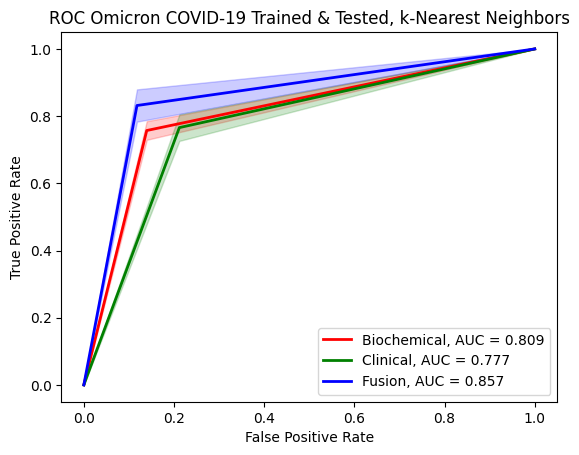

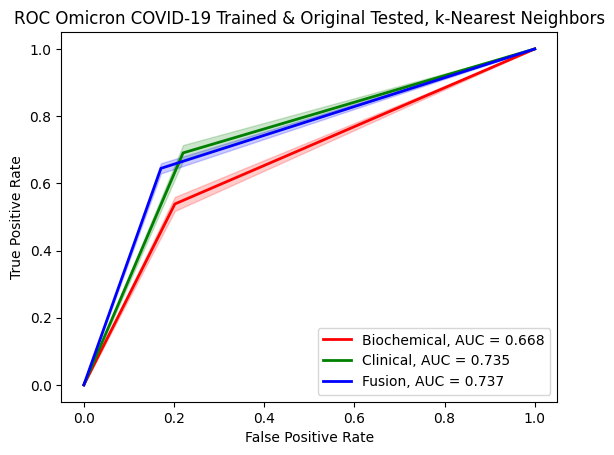

In [ ]:
# ROC Plots---------------------------------------------------------------------
# Plotting the average runs - Omicron Tested
fig, ax = plt.subplots()
ax.plot(bcO_avg_fpr, bcO_avg_tpr, label = 'Biochemical, AUC = %.3f'%bcO_avg_auc, color='red', linewidth=2)
ax.plot(syO_avg_fpr, syO_avg_tpr, label = 'Clinical, AUC = %.3f'%syO_avg_auc, color='green', linewidth=2)
ax.plot(fnO_avg_fpr, fnO_avg_tpr, label = 'Fusion, AUC = %.3f'%fnO_avg_auc, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bcO_avg_fpr, bcO_avg_tpr + bcO_std_tpr, bcO_avg_tpr - bcO_std_tpr, alpha=0.2, color='red')
ax.fill_between(syO_avg_fpr, syO_avg_tpr + syO_std_tpr, syO_avg_tpr - syO_std_tpr, alpha=0.2, color='green')
ax.fill_between(fnO_avg_fpr, fnO_avg_tpr + fnO_std_tpr, fnO_avg_tpr - fnO_std_tpr, alpha=0.2, color='blue')

plt.title(label='ROC Omicron COVID-19 Trained & Tested, k-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the average runs - Original Tested
fig, ax = plt.subplots()
ax.plot(bcO_avg_fpr1, bcO_avg_tpr1, label = 'Biochemical, AUC = %.3f'%bcO_avg_auc1, color='red', linewidth=2)
ax.plot(syO_avg_fpr1, syO_avg_tpr1, label = 'Clinical, AUC = %.3f'%syO_avg_auc1, color='green', linewidth=2)
ax.plot(fnO_avg_fpr1, fnO_avg_tpr1, label = 'Fusion, AUC = %.3f'%fnO_avg_auc1, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bcO_avg_fpr1, bcO_avg_tpr1 + bcO_std_tpr1, bcO_avg_tpr1 - bcO_std_tpr1, alpha=0.2, color='red')
ax.fill_between(syO_avg_fpr1, syO_avg_tpr1 + syO_std_tpr1, syO_avg_tpr1 - syO_std_tpr1, alpha=0.2, color='green')
ax.fill_between(fnO_avg_fpr1, fnO_avg_tpr1 + fnO_std_tpr1, fnO_avg_tpr1 - fnO_std_tpr1, alpha=0.2, color='blue')

plt.title(label='ROC Omicron COVID-19 Trained & Original Tested, k-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Support Vector Machines

### Original Trained Model

---



#### Hyperparameter Tuning, Training, and Prediction



In [ ]:
# Support Vector Machines - Original--------------------------------------------

print('Original Data Runs\n')

# Parameter Grid
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid')}

# FPR recordings: 1-TNR, for plotting AUC
bc_fpr_runs = [] # Original Trained and Tested
sy_fpr_runs = []
fn_fpr_runs = []

bc_fpr_runs1 = [] # Original Trained and Omicron Tested
sy_fpr_runs1 = []
fn_fpr_runs1 = []

# TPR recordings: Sensitivity, Recall
bc_tpr_runs = [] # Original Trained and Tested
sy_tpr_runs = []
fn_tpr_runs = []

bc_tpr_runs1 = [] # Original Trained and Omicron Tested
sy_tpr_runs1 = []
fn_tpr_runs1 = []

# TNR recordings: Specificity, Sensitivity
bc_tnr_runs = [] # Original Trained and Tested
sy_tnr_runs = []
fn_tnr_runs = []

bc_tnr_runs1 = [] # Original Trained and Omicron Tested
sy_tnr_runs1 = []
fn_tnr_runs1 = []

# AUC recordings
bc_auc_runs = [] # Original Trained and Tested
sy_auc_runs = []
fn_auc_runs = []

bc_auc_runs1 = [] # Original Trained and Omicron Tested
sy_auc_runs1 = []
fn_auc_runs1 = []

# Best parameter recordings
bc_params = []
sy_params = []
fn_params = []

for i in range(n_runs):
  j = i+1
  print('Run: ',j,'------------------------------------\n')

  # Train Test Split------------------------------------------------------------
  bioChem_train, bioChem_test, bioChem_labels_train, bioChem_labels_test = train_test_split(bioChem_trim, bioChem_labels, test_size = 1 / 5)
  symp_train, symp_test, symp_labels_train, symp_labels_test = train_test_split(symp_trim, symp_labels, test_size = 1 / 5)
  multi_train, multi_test, multi_labels_train, multi_labels_test = train_test_split(multi_trim, multi_labels, test_size = 1 / 5)

  # Scaling---------------------------------------------------------------------
  # Biochemical Data
  bioChem_scaler = StandardScaler()
  bioChem_train = bioChem_scaler.fit_transform(bioChem_train)
  bioChem_test = bioChem_scaler.transform(bioChem_test)

  # Clinical Data
  symp_scaler = StandardScaler()
  symp_train = symp_scaler.fit_transform(symp_train)
  symp_test = symp_scaler.transform(symp_test)

  # Fusion Data
  multi_scaler = StandardScaler()
  multi_train = multi_scaler.fit_transform(multi_train)
  multi_test = multi_scaler.transform(multi_test)

  # Model Training Grid Search--------------------------------------------------
  # Biochemical model
  bioChem_SVM = svm.SVC()
  bioChem_clf = GridSearchCV(bioChem_SVM, parameters)
  bioChem_clf.fit(bioChem_train, bioChem_labels_train)

  # Clinical model
  symp_SVM = svm.SVC()
  symp_clf = GridSearchCV(symp_SVM, parameters)
  symp_clf.fit(symp_train, symp_labels_train)

  # Fusion model
  multi_SVM = svm.SVC()
  multi_clf = GridSearchCV(multi_SVM, parameters)
  multi_clf.fit(multi_train, multi_labels_train)

  # View results----------------------------------------------------------------
  target_names = ['Non-Severe COVID', 'Severe COVID']

  # Biochemical results---------------------------------------------------------
  print('Biochemical Results\n')

  # Best estimator
  bc_params.append(bioChem_clf.best_params_)

  # Predicting on testing hold-out data
  bioChem_labels_predict = bioChem_clf.predict(bioChem_test)

  # Predicting on Omicron Data
  bioChemO_trim_scale = bioChem_scaler.transform(bioChemO_trim)
  bioChemO_labels_predict = bioChem_clf.predict(bioChemO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(bioChem_labels_test, bioChem_labels_predict)
  bc_fpr_runs.append(fpr)
  bc_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(bioChemO_labels, bioChemO_labels_predict)
  bc_fpr_runs1.append(fpr1)
  bc_tpr_runs1.append(tpr1)

  # AUC
  BC_roc_auc = metrics.auc(fpr, tpr)
  bc_auc_runs.append(BC_roc_auc)

  # AUC - Omicron
  BC_roc_auc1 = metrics.auc(fpr1, tpr1)
  bc_auc_runs1.append(BC_roc_auc1)

  # Clinical results------------------------------------------------------------
  print('Clinical Results\n')

  # Best estimator
  sy_params.append(symp_clf.best_params_)

  # Predicting on testing hold-out data
  symp_labels_predict = symp_clf.predict(symp_test)

  # Predicting on Omicron Data
  sympO_trim_scale = symp_scaler.transform(sympO_trim)
  sympO_labels_predict = symp_clf.predict(sympO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(symp_labels_test, symp_labels_predict)
  sy_fpr_runs.append(fpr)
  sy_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(sympO_labels,sympO_labels_predict)
  sy_fpr_runs1.append(fpr1)
  sy_tpr_runs1.append(tpr1)

  # AUC
  SY_roc_auc = metrics.auc(fpr, tpr)
  sy_auc_runs.append(SY_roc_auc)

  # AUC - Omicron
  SY_roc_auc1 = metrics.auc(fpr1, tpr1)
  sy_auc_runs1.append(SY_roc_auc1)

  # Fusion results--------------------------------------------------------------
  print('Fusion Results\n')

  # Best estimator
  fn_params.append(multi_clf.best_params_)

  # Predicting on testing hold-out data
  multi_labels_predict = multi_clf.predict(multi_test)

  # Predicting on Omicron Data
  multiO_trim_scale = multi_scaler.transform(multiO_trim)
  multiO_labels_predict = multi_clf.predict(multiO_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(multi_labels_test, multi_labels_predict)
  fn_fpr_runs.append(fpr)
  fn_tpr_runs.append(tpr)

  # Omicron testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(multiO_labels, multiO_labels_predict)
  fn_fpr_runs1.append(fpr1)
  fn_tpr_runs1.append(tpr1)

  # AUC
  FN_roc_auc = metrics.auc(fpr, tpr)
  fn_auc_runs.append(FN_roc_auc)

  # AUC - Omicron
  FN_roc_auc1 = metrics.auc(fpr1, tpr1)
  fn_auc_runs1.append(FN_roc_auc1)

print(bc_params)
print(sy_params)
print(fn_params)

Original Data Runs

Run:  1 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  2 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  3 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  4 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  5 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  6 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  7 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  8 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  9 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  10 ------------------------------------

Biochemical Results

Cli

#### Calculating Mean and Standard Deviation of metrics

In [ ]:
# Saving TNR = 1 - FPR----------------------------------------------------------
# Original tested
bc_tnr_runs = np.ones((n_runs,3)) - bc_fpr_runs
sy_tnr_runs = np.ones((n_runs,3)) - sy_fpr_runs
fn_tnr_runs = np.ones((n_runs,3)) - fn_fpr_runs

# Omicron tested
bc_tnr_runs1 = np.ones((n_runs,3)) - bc_fpr_runs1
sy_tnr_runs1 = np.ones((n_runs,3)) - sy_fpr_runs1
fn_tnr_runs1 = np.ones((n_runs,3)) - fn_fpr_runs1

# Averaging over multiple runs--------------------------------------------------
# FPR
bc_avg_fpr = np.mean(bc_fpr_runs, axis=0)
sy_avg_fpr = np.mean(sy_fpr_runs, axis=0)
fn_avg_fpr = np.mean(fn_fpr_runs, axis=0)

# FPR - Omicron
bc_avg_fpr1 = np.mean(bc_fpr_runs1, axis=0)
sy_avg_fpr1 = np.mean(sy_fpr_runs1, axis=0)
fn_avg_fpr1 = np.mean(fn_fpr_runs1, axis=0)

# TPR
bc_avg_tpr = np.mean(bc_tpr_runs, axis=0)
sy_avg_tpr = np.mean(sy_tpr_runs, axis=0)
fn_avg_tpr = np.mean(fn_tpr_runs, axis=0)

# TPR - Omicron
bc_avg_tpr1 = np.mean(bc_tpr_runs1, axis=0)
sy_avg_tpr1 = np.mean(sy_tpr_runs1, axis=0)
fn_avg_tpr1 = np.mean(fn_tpr_runs1, axis=0)

# TNR
bc_avg_tnr = np.mean(bc_tnr_runs, axis=0)
sy_avg_tnr = np.mean(sy_tnr_runs, axis=0)
fn_avg_tnr = np.mean(fn_tnr_runs, axis=0)

# TNR - Omicron
bc_avg_tnr1 = np.mean(bc_tnr_runs1, axis=0)
sy_avg_tnr1 = np.mean(sy_tnr_runs1, axis=0)
fn_avg_tnr1 = np.mean(fn_tnr_runs1, axis=0)

# AUC
bc_avg_auc = np.mean(bc_auc_runs)
sy_avg_auc = np.mean(sy_auc_runs)
fn_avg_auc = np.mean(fn_auc_runs)

# AUC - Omicron
bc_avg_auc1 = np.mean(bc_auc_runs1)
sy_avg_auc1 = np.mean(sy_auc_runs1)
fn_avg_auc1 = np.mean(fn_auc_runs1)

# Standard Deviation of ROC plots-----------------------------------------------
# FPR
bc_std_fpr = np.std(bc_fpr_runs, axis=0)
sy_std_fpr = np.std(sy_fpr_runs, axis=0)
fn_std_fpr = np.std(fn_fpr_runs, axis=0)

# FPR - Omicron
bc_std_fpr1 = np.std(bc_fpr_runs1, axis=0)
sy_std_fpr1 = np.std(sy_fpr_runs1, axis=0)
fn_std_fpr1 = np.std(fn_fpr_runs1, axis=0)

# TPR
bc_std_tpr = np.std(bc_tpr_runs, axis=0)
sy_std_tpr = np.std(sy_tpr_runs, axis=0)
fn_std_tpr = np.std(fn_tpr_runs, axis=0)

# TPR - Omicron
bc_std_tpr1 = np.std(bc_tpr_runs1, axis=0)
sy_std_tpr1 = np.std(sy_tpr_runs1, axis=0)
fn_std_tpr1 = np.std(fn_tpr_runs1, axis=0)

# Printing Results--------------------------------------------------------------
# FPR
print('Mean FPR, original/original, BC: ', bc_avg_fpr)
print('Mean FPR, original/original, SY: ', sy_avg_fpr)
print('Mean FPR, original/original, FN: ', fn_avg_fpr)

# FPR - Omicron
print('Mean FPR, original/omicron, BC: ', bc_avg_fpr1)
print('Mean FPR, original/omicron, SY: ', sy_avg_fpr1)
print('Mean FPR, original/omicron, FN: ', fn_avg_fpr1)

print('\n')

# TPR
print('Mean TPR, original/original, BC: ', bc_avg_tpr)
print('Mean TPR, original/original, SY: ', sy_avg_tpr)
print('Mean TPR, original/original, FN: ', fn_avg_tpr)

# TPR - Omicron
print('Mean TPR, original/omicron, BC: ', bc_avg_tpr1)
print('Mean TPR, original/omicron, SY: ', sy_avg_tpr1)
print('Mean TPR, original/omicron, FN: ', fn_avg_tpr1)

print('\n')

# TNR
print('Mean TNR, original/original, BC: ', bc_avg_tnr)
print('Mean TNR, original/original, SY: ', sy_avg_tnr)
print('Mean TNR, original/original, FN: ', fn_avg_tnr)

# TNR - Omicron
print('Mean TNR, original/omicron, BC: ', bc_avg_tnr1)
print('Mean TNR, original/omicron, SY: ', sy_avg_tnr1)
print('Mean TNR, original/omicron, FN: ', fn_avg_tnr1)

print('\n')

# AUC
print('AUC of biochem composite ROC curve',metrics.auc(bc_avg_fpr, bc_avg_tpr))
print('AUC of symp composite ROC curve',metrics.auc(sy_avg_fpr, sy_avg_tpr))
print('AUC of fusion composite ROC curve',metrics.auc(fn_avg_fpr, fn_avg_tpr))

# AUC - Omicron
print('AUC of biochem composite ROC curve (Omicron)',metrics.auc(bc_avg_fpr1, bc_avg_tpr1))
print('AUC of symp composite ROC curve (Omicron)',metrics.auc(sy_avg_fpr1, sy_avg_tpr1))
print('AUC of fusion composite ROC curve (Omicron)',metrics.auc(fn_avg_fpr1, fn_avg_tpr1))

Mean FPR, original/original, BC:  [0.         0.13378333 1.        ]
Mean FPR, original/original, SY:  [0.         0.20271654 1.        ]
Mean FPR, original/original, FN:  [0.        0.1741312 1.       ]
Mean FPR, original/omicron, BC:  [0.     0.1738 1.    ]
Mean FPR, original/omicron, SY:  [0.     0.1636 1.    ]
Mean FPR, original/omicron, FN:  [0.     0.1368 1.    ]


Mean TPR, original/original, BC:  [0.         0.50465264 1.        ]
Mean TPR, original/original, SY:  [0.         0.64558342 1.        ]
Mean TPR, original/original, FN:  [0.         0.63427554 1.        ]
Mean TPR, original/omicron, BC:  [0.     0.6306 1.    ]
Mean TPR, original/omicron, SY:  [0.     0.7114 1.    ]
Mean TPR, original/omicron, FN:  [0.     0.7852 1.    ]


Mean TNR, original/original, BC:  [1.         0.86621667 0.        ]
Mean TNR, original/original, SY:  [1.         0.79728346 0.        ]
Mean TNR, original/original, FN:  [1.        0.8258688 0.       ]
Mean TNR, original/omicron, BC:  [1.     0.82

#### Displaying ROC Plots and AUC

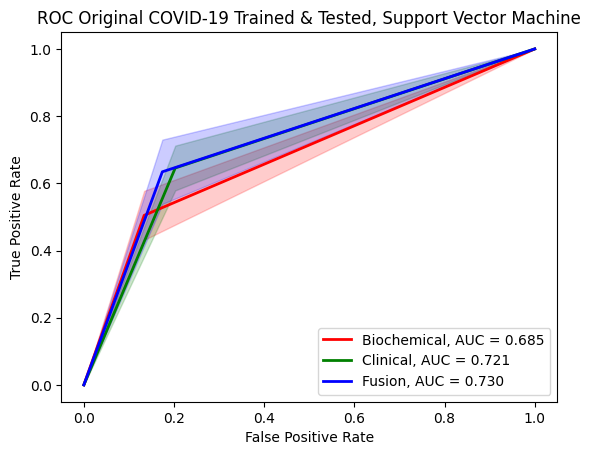

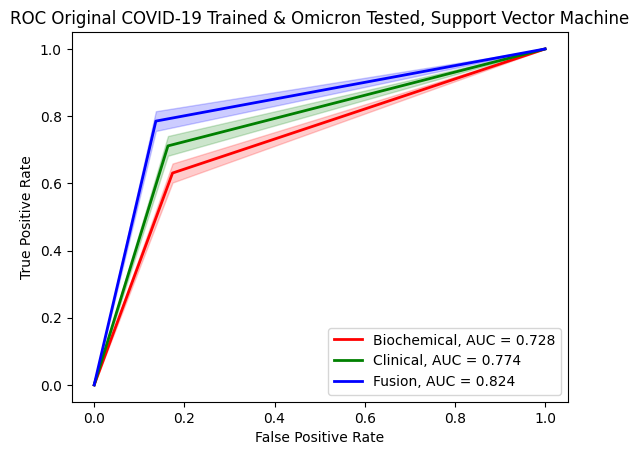

In [ ]:
# ROC Plots---------------------------------------------------------------------
# Plotting the average runs - Original Tested
fig, ax = plt.subplots()
ax.plot(bc_avg_fpr, bc_avg_tpr, label = 'Biochemical, AUC = %.3f'%bc_avg_auc, color='red', linewidth=2)
ax.plot(sy_avg_fpr, sy_avg_tpr, label = 'Clinical, AUC = %.3f'%sy_avg_auc, color='green', linewidth=2)
ax.plot(fn_avg_fpr, fn_avg_tpr, label = 'Fusion, AUC = %.3f'%fn_avg_auc, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bc_avg_fpr, bc_avg_tpr + bc_std_tpr, bc_avg_tpr - bc_std_tpr, alpha=0.2, color='red')
ax.fill_between(sy_avg_fpr, sy_avg_tpr + sy_std_tpr, sy_avg_tpr - sy_std_tpr, alpha=0.2, color='green')
ax.fill_between(fn_avg_fpr, fn_avg_tpr + fn_std_tpr, fn_avg_tpr - fn_std_tpr, alpha=0.2, color='blue')

plt.title(label='ROC Original COVID-19 Trained & Tested, Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the average runs - Omicron Tested
fig, ax = plt.subplots()
ax.plot(bc_avg_fpr1, bc_avg_tpr1, label = 'Biochemical, AUC = %.3f'%bc_avg_auc1, color='red', linewidth=2)
ax.plot(sy_avg_fpr1, sy_avg_tpr1, label = 'Clinical, AUC = %.3f'%sy_avg_auc1, color='green', linewidth=2)
ax.plot(fn_avg_fpr1, fn_avg_tpr1, label = 'Fusion, AUC = %.3f'%fn_avg_auc1, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bc_avg_fpr1, bc_avg_tpr1 + bc_std_tpr1, bc_avg_tpr1 - bc_std_tpr1, alpha=0.2, color='red')
ax.fill_between(sy_avg_fpr1, sy_avg_tpr1 + sy_std_tpr1, sy_avg_tpr1 - sy_std_tpr1, alpha=0.2, color='green')
ax.fill_between(fn_avg_fpr1, fn_avg_tpr1 + fn_std_tpr1, fn_avg_tpr1 - fn_std_tpr1, alpha=0.2, color='blue')

plt.title(label='ROC Original COVID-19 Trained & Omicron Tested, Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Omicron Trained Model

---



#### Hyperparameter Tuning, Training, and Prediction

In [ ]:
# Support Vector Machines - Omicron---------------------------------------------

print('Omicron Data Runs\n')

# Parameter Grid
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid')}

# FPR recordings: 1 - TNR, for plotting ROC
bcO_fpr_runs = [] # Omicron trained and tested
syO_fpr_runs = []
fnO_fpr_runs = []

bcO_fpr_runs1 = [] # Omicron trained and original tested
syO_fpr_runs1 = []
fnO_fpr_runs1 = []

# TPR recordings: Sensitivity, Recall
bcO_tpr_runs = [] # Omicron trained and tested
syO_tpr_runs = []
fnO_tpr_runs = []

bcO_tpr_runs1 = [] # Omicron trained and original tested
syO_tpr_runs1 = []
fnO_tpr_runs1 = []

# TNR recordings: Specificity, Sensitivity
bcO_tnr_runs = [] # Omicron Trained and Tested
syO_tnr_runs = []
fnO_tnr_runs = []

bcO_tnr_runs1 = [] # Omicron Trained and original Tested
syO_tnr_runs1 = []
fnO_tnr_runs1 = []

# AUC recordings
bcO_auc_runs = [] # Omicron trained and tested
syO_auc_runs = []
fnO_auc_runs = []

bcO_auc_runs1 = [] # Omicron trained and original tested
syO_auc_runs1 = []
fnO_auc_runs1 = []

# Best parameter recordings
bcO_params = []
syO_params = []
fnO_params = []

for i in range(n_runs):
  j = i+1
  print('Run: ',j,'------------------------------------\n')

  # Train Test Split------------------------------------------------------------
  bioChemO_train, bioChemO_test, bioChemO_labels_train, bioChemO_labels_test = train_test_split(bioChemO_trim, bioChemO_labels, test_size = 1 / 5)
  sympO_train, sympO_test, sympO_labels_train, sympO_labels_test = train_test_split(sympO_trim, sympO_labels, test_size = 1 / 5)
  multiO_train, multiO_test, multiO_labels_train, multiO_labels_test = train_test_split(multiO_trim, multiO_labels, test_size = 1 / 5)

  # Scaling---------------------------------------------------------------------
  # Biochemical Data
  bioChemO_scaler = StandardScaler()
  bioChemO_train = bioChemO_scaler.fit_transform(bioChemO_train)
  bioChemO_test = bioChemO_scaler.transform(bioChemO_test)

  # Clinical Data
  sympO_scaler = StandardScaler()
  sympO_train = sympO_scaler.fit_transform(sympO_train)
  sympO_test = sympO_scaler.transform(sympO_test)

  # Fusion Data
  multiO_scaler = StandardScaler()
  multiO_train = multiO_scaler.fit_transform(multiO_train)
  multiO_test = multiO_scaler.transform(multiO_test)

  # Model Training Grid Search--------------------------------------------------
  bioChemO_SVM = svm.SVC()
  bioChemO_clf = GridSearchCV(bioChemO_SVM, parameters)
  bioChemO_clf.fit(bioChemO_train, bioChemO_labels_train)

  # Clinical model
  sympO_SVM = svm.SVC()
  sympO_clf = GridSearchCV(sympO_SVM, parameters)
  sympO_clf.fit(sympO_train, sympO_labels_train)

  # Fusion model
  multiO_SVM = svm.SVC()
  multiO_clf = GridSearchCV(multiO_SVM, parameters)
  multiO_clf.fit(multiO_train, multiO_labels_train)

  # View results----------------------------------------------------------------
  target_names = ['Non-Severe COVID', 'Severe COVID']

  # Biochemical results---------------------------------------------------------
  print('Biochemical Results\n')

  # Best estimator
  bcO_params.append(bioChemO_clf.best_params_)

  # Predicting on testing hold-out data
  bioChemO_labels_predict = bioChemO_clf.predict(bioChemO_test)

  # Predicting on original COIVD-19 data
  bioChem_trim_scale = bioChemO_scaler.transform(bioChem_trim)
  bioChem_labels_predict1 = bioChemO_clf.predict(bioChem_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(bioChemO_labels_test, bioChemO_labels_predict)
  bcO_fpr_runs.append(fpr)
  bcO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(bioChem_labels, bioChem_labels_predict1)
  bcO_fpr_runs1.append(fpr1)
  bcO_tpr_runs1.append(tpr1)

  # AUC
  BCO_roc_auc = metrics.auc(fpr, tpr)
  bcO_auc_runs.append(BCO_roc_auc)

  # AUC - Original
  BCO_roc_auc1 = metrics.auc(fpr1, tpr1)
  bcO_auc_runs1.append(BCO_roc_auc1)

  # Clinical results---------------------------------------------------------
  print('Clinical Results\n')

  # Best estimator
  syO_params.append(sympO_clf.best_params_)

  # Predicting on testing hold-out data
  sympO_labels_predict = sympO_clf.predict(sympO_test)

  # Predicting on original COIVD-19 data
  symp_trim_scale = sympO_scaler.transform(symp_trim)
  symp_labels_predict1 = sympO_clf.predict(symp_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(sympO_labels_test, sympO_labels_predict)
  syO_fpr_runs.append(fpr)
  syO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(symp_labels, symp_labels_predict1)
  syO_fpr_runs1.append(fpr1)
  syO_tpr_runs1.append(tpr1)

  # AUC
  SYO_roc_auc = metrics.auc(fpr, tpr)
  syO_auc_runs.append(SYO_roc_auc)

  # AUC - Original
  SYO_roc_auc1 = metrics.auc(fpr1, tpr1)
  syO_auc_runs1.append(SYO_roc_auc1)

  # Fusion results--------------------------------------------------------------
  print('Fusion Results\n')

  # Best estimator
  fnO_params.append(multiO_clf.best_params_)

  # Predicting on testing hold-out data
  multiO_labels_predict = multiO_clf.predict(multiO_test)

  # Predicting on original COIVD-19 data
  multi_trim_scale = multiO_scaler.transform(multi_trim)
  multi_labels_predict1 = multiO_clf.predict(multi_trim_scale)

  # Saving fpr and tpr
  fpr, tpr, thresholds = metrics.roc_curve(multiO_labels_test, multiO_labels_predict)
  fnO_fpr_runs.append(fpr)
  fnO_tpr_runs.append(tpr)

  # Original testing
  fpr1, tpr1, thresholds1 = metrics.roc_curve(multi_labels, multi_labels_predict1)
  fnO_fpr_runs1.append(fpr1)
  fnO_tpr_runs1.append(tpr1)

  # AUC
  FNO_roc_auc = metrics.auc(fpr, tpr)
  fnO_auc_runs.append(FNO_roc_auc)

  # AUC - Original
  FNO_roc_auc1 = metrics.auc(fpr1, tpr1)
  fnO_auc_runs1.append(FNO_roc_auc1)

print(bcO_params)
print(syO_params)
print(fnO_params)

Omicron Data Runs

Run:  1 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  2 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  3 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  4 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  5 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  6 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  7 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  8 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  9 ------------------------------------

Biochemical Results

Clinical Results

Fusion Results

Run:  10 ------------------------------------

Biochemical Results

Clin

#### Calculating Mean and Standard Deviation of metrics

In [ ]:
# Saving TNR = 1 - FPR----------------------------------------------------------
# Omicron tested
bcO_tnr_runs = np.ones((n_runs,3)) - bcO_fpr_runs
syO_tnr_runs = np.ones((n_runs,3)) - syO_fpr_runs
fnO_tnr_runs = np.ones((n_runs,3)) - fnO_fpr_runs

# Original tested
bcO_tnr_runs1 = np.ones((n_runs,3)) - bcO_fpr_runs1
syO_tnr_runs1 = np.ones((n_runs,3)) - syO_fpr_runs1
fnO_tnr_runs1 = np.ones((n_runs,3)) - fnO_fpr_runs1

# Averaging over multiple runs--------------------------------------------------
# FPR
bcO_avg_fpr = np.mean(bcO_fpr_runs, axis=0)
syO_avg_fpr = np.mean(syO_fpr_runs, axis=0)
fnO_avg_fpr = np.mean(fnO_fpr_runs, axis=0)

# FPR - Original
bcO_avg_fpr1 = np.mean(bcO_fpr_runs1, axis=0)
syO_avg_fpr1 = np.mean(syO_fpr_runs1, axis=0)
fnO_avg_fpr1 = np.mean(fnO_fpr_runs1, axis=0)

# TPR
bcO_avg_tpr = np.mean(bcO_tpr_runs, axis=0)
syO_avg_tpr = np.mean(syO_tpr_runs, axis=0)
fnO_avg_tpr = np.mean(fnO_tpr_runs, axis=0)

# TPR - Original
bcO_avg_tpr1 = np.mean(bcO_tpr_runs1, axis=0)
syO_avg_tpr1 = np.mean(syO_tpr_runs1, axis=0)
fnO_avg_tpr1 = np.mean(fnO_tpr_runs1, axis=0)

# TNR
bcO_avg_tnr = np.mean(bcO_tnr_runs, axis=0)
syO_avg_tnr = np.mean(syO_tnr_runs, axis=0)
fnO_avg_tnr = np.mean(fnO_tnr_runs, axis=0)

# TNR - Original
bcO_avg_tnr1 = np.mean(bcO_tnr_runs1, axis=0)
syO_avg_tnr1 = np.mean(syO_tnr_runs1, axis=0)
fnO_avg_tnr1 = np.mean(fnO_tnr_runs1, axis=0)

# AUC
bcO_avg_auc = np.mean(bcO_auc_runs)
syO_avg_auc = np.mean(syO_auc_runs)
fnO_avg_auc = np.mean(fnO_auc_runs)

# AUC - Original
bcO_avg_auc1 = np.mean(bcO_auc_runs1)
syO_avg_auc1 = np.mean(syO_auc_runs1)
fnO_avg_auc1 = np.mean(fnO_auc_runs1)

# Standard Deviation of ROC plots-----------------------------------------------
# FPR
bcO_std_fpr = np.std(bcO_fpr_runs, axis=0)
syO_std_fpr = np.std(syO_fpr_runs, axis=0)
fnO_std_fpr = np.std(fnO_fpr_runs, axis=0)

# FPR - Original
bcO_std_fpr1 = np.std(bcO_fpr_runs1, axis=0)
syO_std_fpr1 = np.std(syO_fpr_runs1, axis=0)
fnO_std_fpr1 = np.std(fnO_fpr_runs1, axis=0)

# TPR
bcO_std_tpr = np.std(bcO_tpr_runs, axis=0)
syO_std_tpr = np.std(syO_tpr_runs, axis=0)
fnO_std_tpr = np.std(fnO_tpr_runs, axis=0)

# TPR - Original
bcO_std_tpr1 = np.std(bcO_tpr_runs1, axis=0)
syO_std_tpr1 = np.std(syO_tpr_runs1, axis=0)
fnO_std_tpr1 = np.std(fnO_tpr_runs1, axis=0)

# Printing Results--------------------------------------------------------------
# FPR
print('Mean FPR, omicron/omicron, BC: ', bcO_avg_fpr)
print('Mean FPR, omicron/omicron, SY: ', syO_avg_fpr)
print('Mean FPR, omicron/omicron, FN: ', fnO_avg_fpr)

# FPR - Original
print('Mean FPR, omicron/original, BC: ', bcO_avg_fpr1)
print('Mean FPR, omicron/original, SY: ', syO_avg_fpr1)
print('Mean FPR, omicron/original, FN: ', fnO_avg_fpr1)

print('\n')

# TPR
print('Mean TPR, omicron/omicron, BC: ', bcO_avg_tpr)
print('Mean TPR, omicron/omicron, SY: ', syO_avg_tpr)
print('Mean TPR, omicron/omicron, FN: ', fnO_avg_tpr)

# TPR - Original
print('Mean TPR, omicron/original, BC: ', bcO_avg_tpr1)
print('Mean TPR, omicron/original, SY: ', syO_avg_tpr1)
print('Mean TPR, omicron/original, FN: ', fnO_avg_tpr1)

print('\n')

# TNR
print('Mean TNR, omicron/omicron, BC: ', bcO_avg_tnr)
print('Mean TNR, omicron/omicron, SY: ', syO_avg_tnr)
print('Mean TNR, omicron/omicron, FN: ', fnO_avg_tnr)

# TNR - Original
print('Mean TNR, omicron/original, BC: ', bcO_avg_tnr1)
print('Mean TNR, omicron/original, SY: ', syO_avg_tnr1)
print('Mean TNR, omicron/original, FN: ', fnO_avg_tnr1)

print('\n')

# AUC
print('AUC of biochem composite ROC curve',metrics.auc(bcO_avg_fpr, bcO_avg_tpr))
print('AUC of symp composite ROC curve',metrics.auc(syO_avg_fpr, syO_avg_tpr))
print('AUC of fusion composite ROC curve',metrics.auc(fnO_avg_fpr, fnO_avg_tpr))

# AUC - Original
print('AUC of biochem composite ROC curve (Original)',metrics.auc(bcO_avg_fpr1, bcO_avg_tpr1))
print('AUC of symp composite ROC curve (Original)',metrics.auc(syO_avg_fpr1, syO_avg_tpr1))
print('AUC of fusion composite ROC curve (Original)',metrics.auc(fnO_avg_fpr1, fnO_avg_tpr1))

Mean FPR, omicron/omicron, BC:  [0.         0.12053067 1.        ]
Mean FPR, omicron/omicron, SY:  [0.         0.17983588 1.        ]
Mean FPR, omicron/omicron, FN:  [0.         0.11475666 1.        ]
Mean FPR, omicron/original, BC:  [0.         0.22102804 1.        ]
Mean FPR, omicron/original, SY:  [0.         0.23317757 1.        ]
Mean FPR, omicron/original, FN:  [0.         0.21588785 1.        ]


Mean TPR, omicron/omicron, BC:  [0.         0.82142146 1.        ]
Mean TPR, omicron/omicron, SY:  [0.         0.80572533 1.        ]
Mean TPR, omicron/omicron, FN:  [0.         0.92421495 1.        ]
Mean TPR, omicron/original, BC:  [0.         0.57432432 1.        ]
Mean TPR, omicron/original, SY:  [0.         0.76283784 1.        ]
Mean TPR, omicron/original, FN:  [0.         0.70743243 1.        ]


Mean TNR, omicron/omicron, BC:  [1.         0.87946933 0.        ]
Mean TNR, omicron/omicron, SY:  [1.         0.82016412 0.        ]
Mean TNR, omicron/omicron, FN:  [1.         0.885243

#### Displaying ROC Plots and AUC

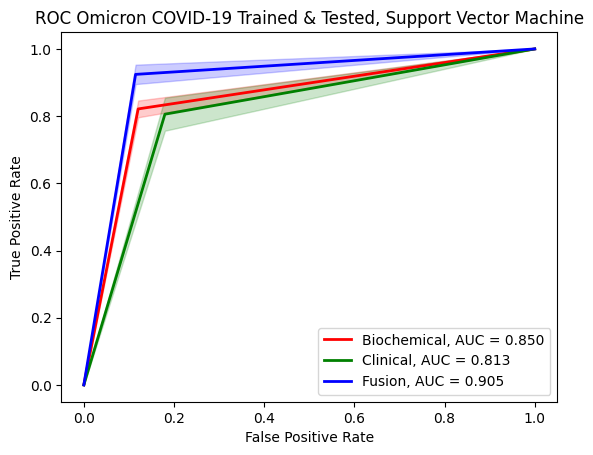

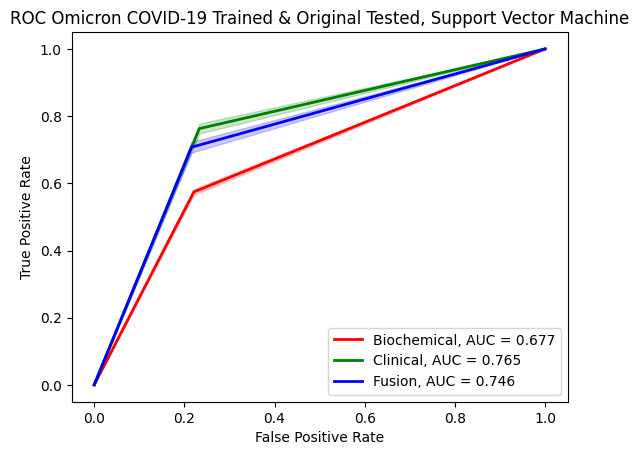

In [ ]:
# ROC Plots---------------------------------------------------------------------
# Plotting the average runs - Omicron Tested
fig, ax = plt.subplots()
ax.plot(bcO_avg_fpr, bcO_avg_tpr, label = 'Biochemical, AUC = %.3f'%bcO_avg_auc, color='red', linewidth=2)
ax.plot(syO_avg_fpr, syO_avg_tpr, label = 'Clinical, AUC = %.3f'%syO_avg_auc, color='green', linewidth=2)
ax.plot(fnO_avg_fpr, fnO_avg_tpr, label = 'Fusion, AUC = %.3f'%fnO_avg_auc, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bcO_avg_fpr, bcO_avg_tpr + bcO_std_tpr, bcO_avg_tpr - bcO_std_tpr, alpha=0.2, color='red')
ax.fill_between(syO_avg_fpr, syO_avg_tpr + syO_std_tpr, syO_avg_tpr - syO_std_tpr, alpha=0.2, color='green')
ax.fill_between(fnO_avg_fpr, fnO_avg_tpr + fnO_std_tpr, fnO_avg_tpr - fnO_std_tpr, alpha=0.2, color='blue')

plt.title(label='ROC Omicron COVID-19 Trained & Tested, Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the average runs - Original Tested
fig, ax = plt.subplots()
ax.plot(bcO_avg_fpr1, bcO_avg_tpr1, label = 'Biochemical, AUC = %.3f'%bcO_avg_auc1, color='red', linewidth=2)
ax.plot(syO_avg_fpr1, syO_avg_tpr1, label = 'Clinical, AUC = %.3f'%syO_avg_auc1, color='green', linewidth=2)
ax.plot(fnO_avg_fpr1, fnO_avg_tpr1, label = 'Fusion, AUC = %.3f'%fnO_avg_auc1, color='blue', linewidth=2)

# Intervals of 1 Standard Deviation
ax.fill_between(bcO_avg_fpr1, bcO_avg_tpr1 + bcO_std_tpr1, bcO_avg_tpr1 - bcO_std_tpr1, alpha=0.2, color='red')
ax.fill_between(syO_avg_fpr1, syO_avg_tpr1 + syO_std_tpr1, syO_avg_tpr1 - syO_std_tpr1, alpha=0.2, color='green')
ax.fill_between(fnO_avg_fpr1, fnO_avg_tpr1 + fnO_std_tpr1, fnO_avg_tpr1 - fnO_std_tpr1, alpha=0.2, color='blue')

plt.title(label='ROC Omicron COVID-19 Trained & Original Tested, Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()